In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [4]:
import warnings
warnings.filterwarnings("ignore")

## <font color ="black">Studying the most relevant risk factors for heart disease Data Set</font>

Index:
1. [**Intro**](#presentation)<br>
2. [**Descriptive Analysis of the Database**](#EDA)<br>
3. [**Pre-processing of the database**](#Pre)<br>
4. [**Supervised or Unsupervised Learning**](#Modelling)<br>
5. [**Feature Selection and Extraction**](#Feature)<br>
6. [**Final Model Selection**](#final)<br>
6. [**Conclusion**](#Conclusionf)<br>
    
<a id='presentation'></a>
## <span style="color:darkslateblue">1. Intro </span>
<a id='source'></a>
### <span style="color:slateblue">1.1 Source of the dataset </span>
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease)


<a id='EDA'></a>
## <span style="color:darkslateblue"> 2. Descriptive Analysis of the Dataset</span>

Once data is acquired, after ensuring its quality is optimal for data analysis, a deep exploration before pre-processing must be performed to better understand the data and be able to perform a proper pre-processing and modelling. This is what is called **Exploratory Data Analysis (EDA)**.

Understanding the dataset implies several issues:
1. Get information about data types, shape of the dataset and descriptive metrics.
2. Extract information about the relevancy of some features over others.
3. Identify outliers, missing values or human error.
4. Understand the relationship, or lack of, between variables.
5. Maximize the insight into the dataset and minimize the potential error that may occur during the next steps in the analysis porocess. 

Hence, the main purpose of EDA is to **explore the structure of the data** and **find patterns in behavior and distribution of the data**.

**Descriptive analysis** is the first approach in EDA to summarize the main characteristics of the dataset. It makes use of descriptive statistics and visual methods to get a deeper insigth into the data. In order to carry out a descriptive analysis, we will follow several steps:

0. [**Load Data**](#load)
1. [**Identification of variables and data types**](#dtypes)
2. [**Descriptive statistics of the dataset**](#descriptive)
3. [**Univariate Analysis: Graphical and Non-Graphical**](#univariate)
4. [**Multivariate Analysis: Graphical**](#multivariate)

<a id='load'></a>
### <span style="color:slateblue"> 2.0 Load Data</span>
To load the dataset we will use Pandas method called ***read_csv*** that read CSV (comma-separated) files and convert it into a DataFrame.

In [5]:
dirname = os.path.abspath('')
cleveland_filename = os.path.join(dirname, 'clevelandFinal.csv')
hungarian_filename = os.path.join(dirname, 'hungarianFinal.csv')
longBeach_filename = os.path.join(dirname, 'longBeachFinal.csv')
switzerland_filename = os.path.join(dirname, 'switzerlandFinal.csv')

cleveland_data = pd.read_csv(cleveland_filename, sep=',',  error_bad_lines=False, encoding='iso-8859-1')
hungarian_data = pd.read_csv(hungarian_filename, sep=',',  error_bad_lines=False, encoding='iso-8859-1')
longBeach_data = pd.read_csv(longBeach_filename, sep=',',  error_bad_lines=False, encoding='iso-8859-1')
switzerland_data = pd.read_csv(switzerland_filename, sep=',',  error_bad_lines=False, encoding='iso-8859-1')

<a id='dtypes'></a>
### <span style="color:slateblue"> 2.1 Identification of variables and data types</span>

In order to get a summary of the dataset, we will use the method ***info***, which shows information such as number of observations, column names, variable type, and number of null entries, among others. 

In [6]:
cleveland_data.nunique()
hungarian_data.nunique()
longBeach_data.nunique()
switzerland_data.nunique()

id          123
age          37
sex           2
cp            4
trestbps     21
htn           3
cigs          3
fbs           3
dm            2
restecg       4
ekgmo        13
ekgday       30
ekgyr         2
prop          3
nitr          3
pro           3
diuretic      3
proto         1
thaldur      19
thaltime     54
met          10
thalach      67
thalrest     50
tpeakbps     24
tpeakbpd     15
dummy        21
trestbpd     14
exang         3
xhypo         2
oldpeak      38
slope         5
rldv5e       31
thal          8
cmo          16
cday         37
cyr           6
num           5
lmt           2
ladprox       2
laddist       2
cxmain        2
om1           2
rcaprox       2
rcadist       2
lvx1          5
lvx2          5
lvx3          6
lvx4          8
lvf           6
dtype: int64

In [7]:
cleveland_data= cleveland_data.drop(columns=['proto', 'lvx1','lvx2'])
hungarian_data= hungarian_data.drop(columns=['proto', 'lvx1','lvx2'])
longBeach_data= longBeach_data.drop(columns=['proto', 'lvx1','lvx2'])
switzerland_data= switzerland_data.drop(columns=['proto', 'lvx1','lvx2'])

In [8]:
cleveland_data.info()
hungarian_data.info()
longBeach_data.info()
switzerland_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        282 non-null    int64  
 1   age       282 non-null    int64  
 2   sex       282 non-null    int64  
 3   cp        282 non-null    int64  
 4   trestbps  282 non-null    int64  
 5   htn       282 non-null    int64  
 6   cigs      282 non-null    float64
 7   fbs       282 non-null    int64  
 8   dm        282 non-null    float64
 9   restecg   282 non-null    int64  
 10  ekgmo     282 non-null    int64  
 11  ekgday    282 non-null    int64  
 12  ekgyr     282 non-null    int64  
 13  prop      282 non-null    float64
 14  nitr      282 non-null    float64
 15  pro       282 non-null    float64
 16  diuretic  282 non-null    float64
 17  thaldur   282 non-null    float64
 18  thaltime  282 non-null    float64
 19  met       282 non-null    float64
 20  thalach   282 non-null    int64 

<a id='descriptive'></a>
### <span style="color:slateblue"> 2.2 Descriptive statistics of the dataset</span>

In order to summarize the main and most basic statistical characteristics of the dataset, we will use the method ***describe***.

In [9]:
cleveland_data.describe()

,id,age,sex,cp,trestbps,htn,cigs,fbs,dm,restecg,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000
mean,151.517730,54.411348,0.677305,3.163121,131.563830,0.617021,16.939716,0.148936,0.08156,1.014184,...,1.042553,1.141844,1.205674,1.156028,1.163121,1.173759,1.127660,1.134752,1.411348,1.14539
std,87.131234,9.053083,0.468338,0.955405,17.757496,0.486977,19.489068,0.356658,0.27418,0.998118,...,0.202206,0.349510,0.404912,0.363527,0.370132,0.379576,0.334304,0.766002,1.439508,0.44257
min,1.000000,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,75.250000,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
50%,151.500000,55.000000,1.000000,3.000000,130.000000,1.000000,10.000000,0.000000,0.00000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
75%,227.750000,61.000000,1.000000,4.000000,140.000000,1.000000,30.000000,0.000000,0.00000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,298.000000,77.000000,1.000000,4.000000,200.000000,1.000000,99.000000,1.000000,1.00000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,8.000000,4.00000


In [10]:
hungarian_data.describe()

,id,age,sex,cp,trestbps,htn,cigs,fbs,dm,restecg,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.0,294.000000,294.000000,294.000000,...,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,1195.853741,47.826531,0.724490,2.982993,132.659864,0.333333,60.0,0.069728,0.071429,0.221088,...,1.784014,1.845238,1.732993,1.794218,1.904762,1.761905,1.775510,1.068027,1.479592,1.102041
std,397.340367,7.811812,0.447533,0.965117,17.644961,0.472208,0.0,0.253444,0.257978,0.462333,...,0.320169,0.278393,0.339594,0.310785,0.217285,0.316408,0.293174,0.454929,1.549389,0.364550
min,1001.000000,28.000000,0.000000,1.000000,92.000000,0.000000,60.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1080.250000,42.000000,0.000000,2.000000,120.000000,0.000000,60.0,0.000000,0.000000,0.000000,...,1.500000,1.500000,1.500000,1.500000,2.000000,1.500000,1.500000,1.000000,1.000000,1.000000
50%,1158.500000,49.000000,1.000000,3.000000,130.000000,0.000000,60.0,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,1235.750000,54.000000,1.000000,4.000000,140.000000,1.000000,60.0,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,5002.000000,66.000000,1.000000,4.000000,200.000000,1.000000,60.0,1.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,8.000000,4.000000


In [11]:
longBeach_data.describe()

,id,age,sex,cp,trestbps,htn,cigs,fbs,dm,restecg,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,...,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,101.310000,59.350000,0.970000,3.505000,131.165000,0.547500,21.78000,0.357500,0.195000,0.735000,...,1.85000,1.335000,1.155000,1.350000,1.175000,1.417500,1.105000,1.165000,2.130000,1.165000
std,58.717824,7.811697,0.171015,0.795701,19.774553,0.497727,15.91692,0.476528,0.397195,0.683455,...,11.38356,0.473175,0.362813,0.478167,0.380921,0.493112,0.307323,0.692947,2.242374,0.582643
min,1.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,50.750000,55.000000,1.000000,3.000000,120.000000,0.000000,10.00000,0.000000,0.000000,0.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,100.500000,60.000000,1.000000,4.000000,130.000000,1.000000,20.00000,0.000000,0.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,152.250000,64.000000,1.000000,4.000000,142.000000,1.000000,30.00000,1.000000,0.000000,1.000000,...,1.00000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,202.000000,77.000000,1.000000,4.000000,190.000000,1.000000,80.00000,1.000000,1.000000,2.000000,...,162.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,7.000000,5.000000


In [12]:
switzerland_data.describe()

,id,age,sex,cp,trestbps,htn,cigs,fbs,dm,restecg,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,...,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,3625.886179,55.317073,0.918699,3.699187,129.898374,0.308943,29.512195,0.081301,0.065041,0.361789,...,1.040650,1.504065,1.333333,1.276423,1.089431,1.422764,1.235772,1.292683,1.573171,1.524390
std,499.271374,9.032108,0.274414,0.688726,22.516839,0.445930,5.704996,0.251014,0.247606,0.587788,...,0.198287,0.502028,0.473333,0.449058,0.286532,0.496019,0.426217,1.022146,1.457995,0.718188
min,3001.000000,32.000000,0.000000,1.000000,80.000000,0.000000,20.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3031.500000,51.000000,1.000000,4.000000,115.000000,0.000000,30.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,4012.000000,56.000000,1.000000,4.000000,125.000000,0.000000,30.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,4042.500000,61.500000,1.000000,4.000000,145.000000,1.000000,30.000000,0.000000,0.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
max,4074.000000,74.000000,1.000000,4.000000,200.000000,1.000000,40.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,8.000000,4.000000


The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

In [13]:
cleveland_data.loc[cleveland_data['num'] > 0, 'num'] = 1
hungarian_data.loc[hungarian_data['num'] > 0, 'num'] = 1
longBeach_data.loc[longBeach_data['num'] > 0, 'num'] = 1
switzerland_data.loc[switzerland_data['num'] > 0, 'num'] = 1

In [14]:
#Function to plot percentages on sns.countplot bars
#https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

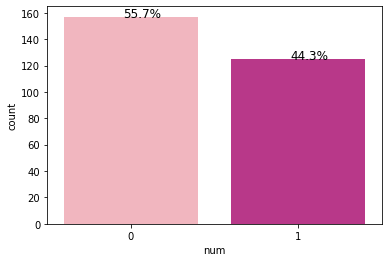

In [15]:
axCleveland = sns.countplot(cleveland_data['num'],label="count", palette="RdPu")
without_hue(axCleveland, cleveland_data['num'])

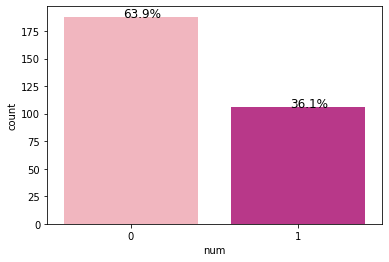

In [16]:
axHungarian = sns.countplot(hungarian_data['num'],label="count", palette="RdPu")
without_hue(axHungarian, hungarian_data['num'])

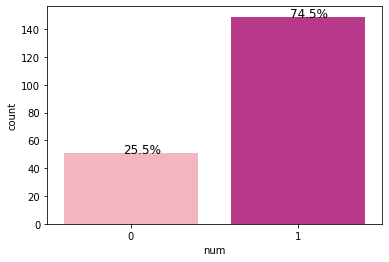

In [17]:
axLongBeach = sns.countplot(longBeach_data['num'],label="count", palette="RdPu")
without_hue(axLongBeach, longBeach_data['num'])

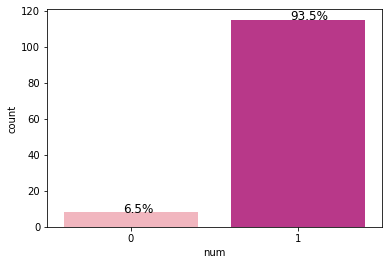

In [18]:
axSwitzerland = sns.countplot(switzerland_data['num'],label="count", palette="RdPu")
without_hue(axSwitzerland, switzerland_data['num'])

<a id="univariate"></a>
### <span style="color:slateblue"> 2.3 Univariate Analysis: Graphical</span>

#### <span style="color:#DB8AC4">M/B Frequency Distribution</span>

We will first analyze how feature values are distributed when comparing benign and malignant cases. The way we will do it is by plotting the **frequency distribution** of each variable for each diagnosis by means of **histograms**. 

We will only plot the histograms for the **_mean** variables since these are the most interpretable ones for our purpose, which is to analyze differences in nuclei between malignant and benignant tissues and identify those variables that may be useful for our analysis. 

In [19]:
def MBFrequencyDistribution(df):
    features_mean=list(df.columns[2:12])
    # split dataframe into two based on num
    dfM=df[df['num'] ==1]
    dfB=df[df['num'] ==0]

    #Stack the data
    plt.rcParams.update({'font.size': 8})
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
    axes = axes.ravel()
    for idx,ax in enumerate(axes):
        ax.figure
        binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
        if binwidth == 0:
            binwidth = 0.01
        ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['#A9009A','#F47CA9'])
        ax.legend(loc='upper right')
        ax.set_title(features_mean[idx])
    plt.tight_layout()
    plt.show()

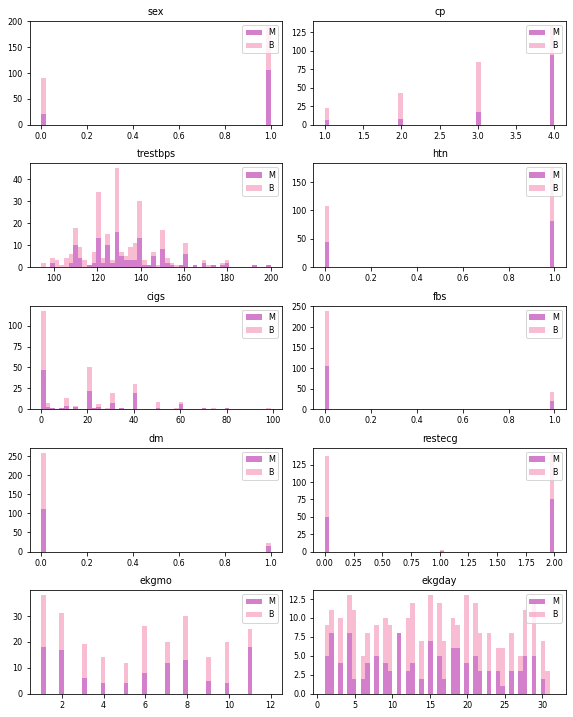

In [20]:
MBFrequencyDistribution(cleveland_data)

No handles with labels found to put in legend.


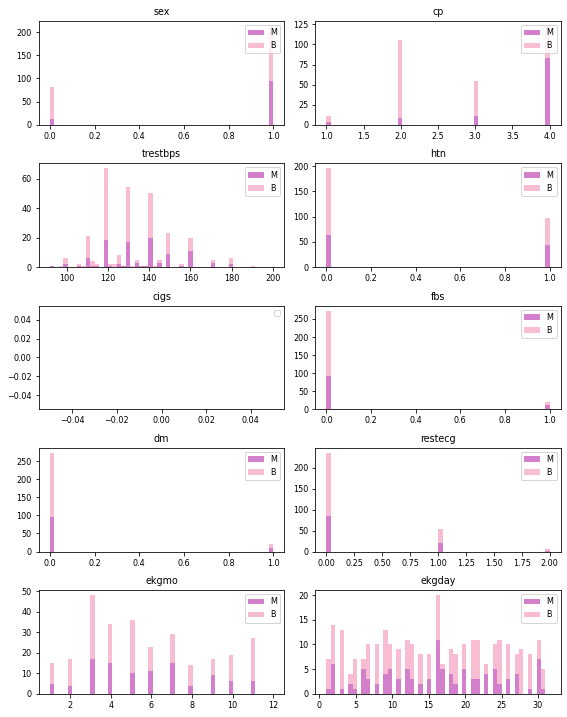

In [21]:
MBFrequencyDistribution(hungarian_data)

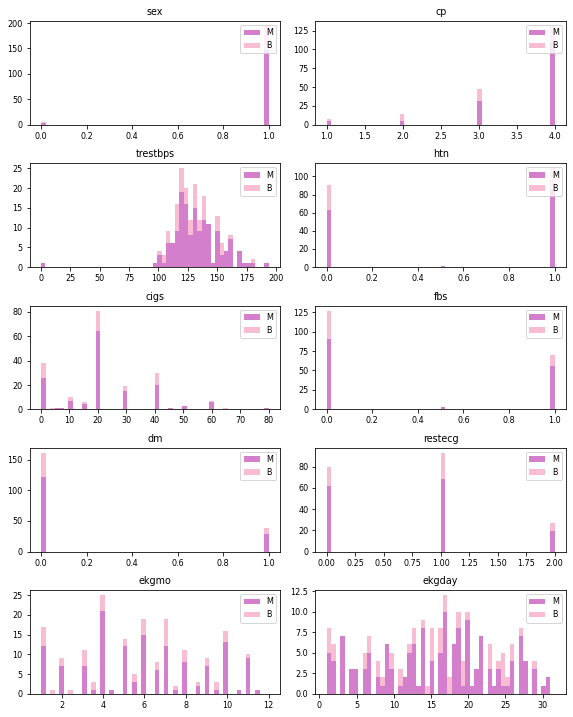

In [22]:
MBFrequencyDistribution(longBeach_data)

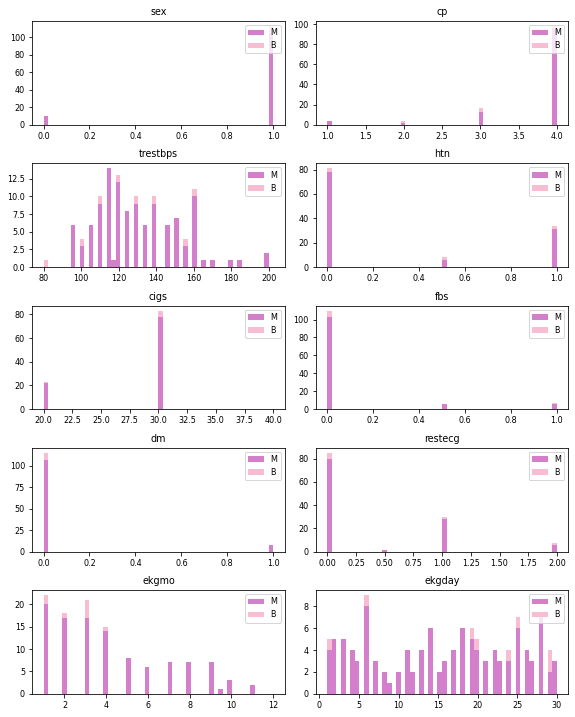

In [23]:
MBFrequencyDistribution(switzerland_data)

From this analysis we decided to esclude the data collections of Switzerland and Hungaria because they were presenting some corrupted columns.

### <span style="color:slateblue"> 2.4 Multivariate Analysis</span>

#### <span style="color:#DB8AC4">Correlation</span>

Now we are going to analyze the relationships between pairs of variables. Analyzing the correlation between variables can give us information about:
1. **How to handle missing data**: if two variables are highly correlated, they can be used to predict missing values among themselves. 
2. **Collinearity between variables**: linear models rely on the independency of the variables. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. This way, if there exists a significant relationship between predictors, coefficient estimations and predictions can be less precisse and less reliable. It also causes **overfitting** in linear regression analysis models. In our case, we are dealing with a classification problem and we will mainly use non-parametric models, so we won't be significantly affected by multicollinearity. 
3. **Redundant variables**: features that show a very high correlation may suppose adding redundant data to our analysis, since two predictors may be providing the same information about the response variable. We will further confirm this when variables are scaled.
4. **Find relevant relationships for interpretation of the analysis.**

To show correlation between features we will both display a **correlation matrix**, a **heatmap** (Pearson's Correlation Coefficient) and a **scatter plot**. 

In [24]:
#Stack the data
def dataStack(df):
    features_mean=list(df.columns[2:12])
    dfM=df[df['num'] ==1]
    dfB=df[df['num'] ==0]
    
    plt.rcParams.update({'font.size': 8})
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
    axes = axes.ravel()
    for idx,ax in enumerate(axes):
        ax.figure
        binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
        ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['#A9009A','#F47CA9'])
        ax.legend(loc='upper right')
        ax.set_title(features_mean[idx])
    plt.tight_layout()
    plt.show()

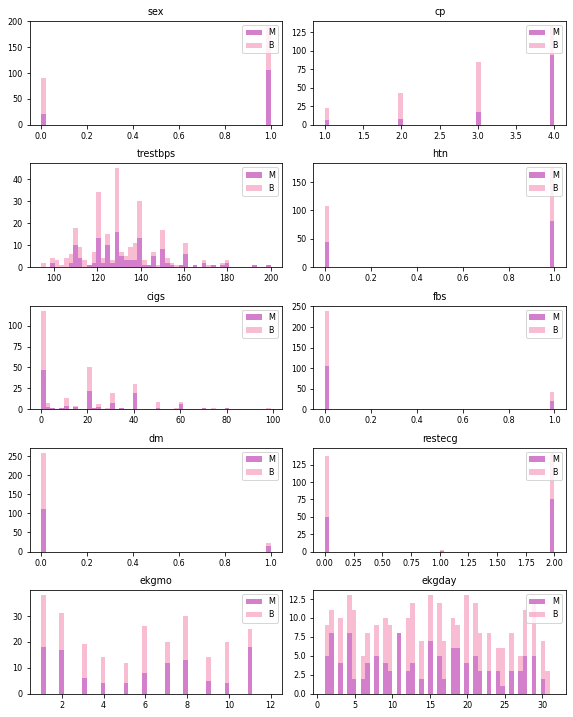

In [25]:
dataStack(cleveland_data)

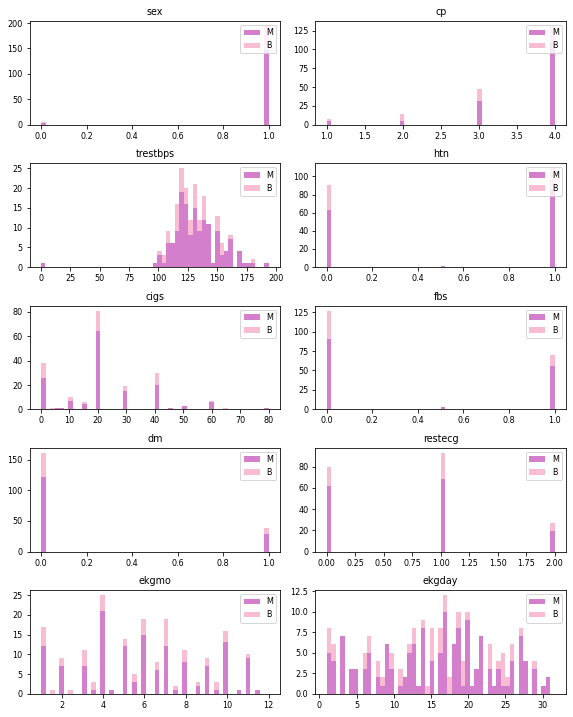

In [26]:
dataStack(longBeach_data)

In [27]:
cleveland_data.corr()

,id,age,sex,cp,trestbps,htn,cigs,fbs,dm,restecg,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
id,1.000000,-0.008107,-0.091995,0.014115,-0.037499,-0.026175,-0.157423,-0.041998,0.019230,-0.126037,...,-0.033169,-0.186121,0.075347,0.005642,0.104078,-0.037700,0.022646,0.096527,0.013901,-0.003712
age,-0.008107,1.000000,-0.091125,0.077383,0.274466,-0.035174,-0.121958,0.104400,0.066723,0.134438,...,0.126486,0.056849,0.112752,0.157767,0.181691,0.099258,0.194242,0.022769,0.057150,-0.022086
sex,-0.091995,-0.091125,1.000000,0.022619,-0.058920,0.095946,0.329268,0.054396,0.011695,0.032665,...,0.070360,0.106699,0.182337,0.171370,0.140503,0.096331,0.127673,0.062122,0.107856,0.055465
cp,0.014115,0.077383,0.022619,1.000000,-0.070886,0.020017,0.097143,-0.071550,-0.010213,0.061007,...,0.111309,0.292811,0.244135,0.213357,0.226393,0.314090,0.123985,0.125464,0.202032,0.027875
trestbps,-0.037499,0.274466,-0.058920,-0.070886,1.000000,-0.151487,-0.035059,0.142902,0.172523,0.128652,...,0.110244,0.046128,0.045187,0.043106,0.173839,0.046130,0.147892,0.044104,0.017903,0.056097
htn,-0.026175,-0.035174,0.095946,0.020017,-0.151487,1.000000,0.056241,-0.162173,-0.058410,-0.076643,...,0.021530,-0.035144,-0.014208,0.097518,-0.086536,-0.043011,0.039068,0.014818,0.058003,0.061130
cigs,-0.157423,-0.121958,0.329268,0.097143,-0.035059,0.056241,1.000000,0.046350,-0.001075,-0.042948,...,0.080121,0.073880,-0.032020,0.054576,-0.017625,0.021866,0.007194,-0.039025,-0.000318,0.007621
fbs,-0.041998,0.104400,0.054396,-0.071550,0.142902,-0.162173,0.046350,1.000000,0.384825,0.054025,...,-0.038846,0.029763,0.058198,0.012264,0.004015,0.071031,0.078745,0.121668,0.005014,0.087783
dm,0.019230,0.066723,0.011695,-0.010213,0.172523,-0.058410,-0.001075,0.384825,1.000000,0.060777,...,0.001366,0.027391,0.040694,0.086095,0.113906,0.034316,0.118955,0.015262,-0.013173,-0.039415
restecg,-0.126037,0.134438,0.032665,0.061007,0.128652,-0.076643,-0.042948,0.054025,0.060777,1.000000,...,0.138060,0.137029,0.063199,0.033110,0.118942,0.162549,0.069211,0.062655,0.124720,0.148382


In [28]:
longBeach_data.corr()

,id,age,sex,cp,trestbps,htn,cigs,fbs,dm,restecg,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
id,1.000000,0.020841,-0.090648,0.010615,0.096787,0.062855,-0.182219,0.113293,-0.012085,0.156576,...,0.052222,0.130265,-0.137427,-0.068495,0.031712,0.012863,-0.195630,0.050855,0.031751,-0.088458
age,0.020841,1.000000,0.034230,-0.038280,0.175258,0.219295,-0.175102,0.120110,0.045915,0.002400,...,0.144128,0.142136,0.009131,0.077355,0.109347,0.199300,0.131138,0.065401,0.083452,0.100968
sex,-0.090648,0.034230,1.000000,0.038036,0.002957,0.016825,0.148943,-0.052722,-0.061403,0.060621,...,0.013164,0.062721,0.075320,0.067597,0.003857,0.149271,0.060236,0.041980,0.088845,0.049928
cp,0.010615,-0.038280,0.038036,1.000000,0.087294,-0.022807,0.010007,-0.034557,-0.074650,0.034790,...,0.045020,0.082283,0.075632,0.087829,0.088284,0.081101,0.069766,-0.088084,0.019348,-0.223991
trestbps,0.096787,0.175258,0.002957,0.087294,1.000000,0.222826,-0.182082,0.152891,0.045786,0.070179,...,0.106013,0.078918,-0.077127,0.079956,-0.052553,0.028201,0.087265,0.044577,0.027279,-0.055149
htn,0.062855,0.219295,0.016825,-0.022807,0.222826,1.000000,0.014012,0.124023,0.168970,0.088892,...,0.063791,0.038780,0.000765,0.035366,0.154721,0.067233,0.049360,0.101006,0.064227,0.033487
cigs,-0.182219,-0.175102,0.148943,0.010007,-0.182082,0.014012,1.000000,-0.112807,-0.086972,-0.131955,...,-0.005758,-0.006178,0.012896,0.097321,0.076830,0.125724,-0.002445,0.037022,0.065852,0.003392
fbs,0.113293,0.120110,-0.052722,-0.034557,0.152891,0.124023,-0.112807,1.000000,0.466141,0.161198,...,0.096550,0.067917,-0.031463,0.021502,-0.152606,0.088722,0.154153,0.094390,0.010370,0.076061
dm,-0.012085,0.045915,-0.061403,-0.074650,0.045786,0.168970,-0.086972,0.466141,1.000000,0.209824,...,-0.036842,-0.055213,-0.106181,0.062177,-0.093827,-0.109874,-0.045078,0.156376,0.039099,0.055697
restecg,0.156576,0.002400,0.060621,0.034790,0.070179,0.088892,-0.131955,0.161198,0.209824,1.000000,...,-0.074891,-0.003807,-0.137500,-0.083802,-0.071900,0.024267,-0.058256,0.092789,0.094728,0.034640


In [29]:
def correlationMap(df):
    f,ax=plt.subplots(figsize = (18,18))
    sns.heatmap(df.corr(),annot= True,linewidths=1,fmt = ".1f",ax=ax, cmap='RdPu' )
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('Correlation Map')
    plt.show()

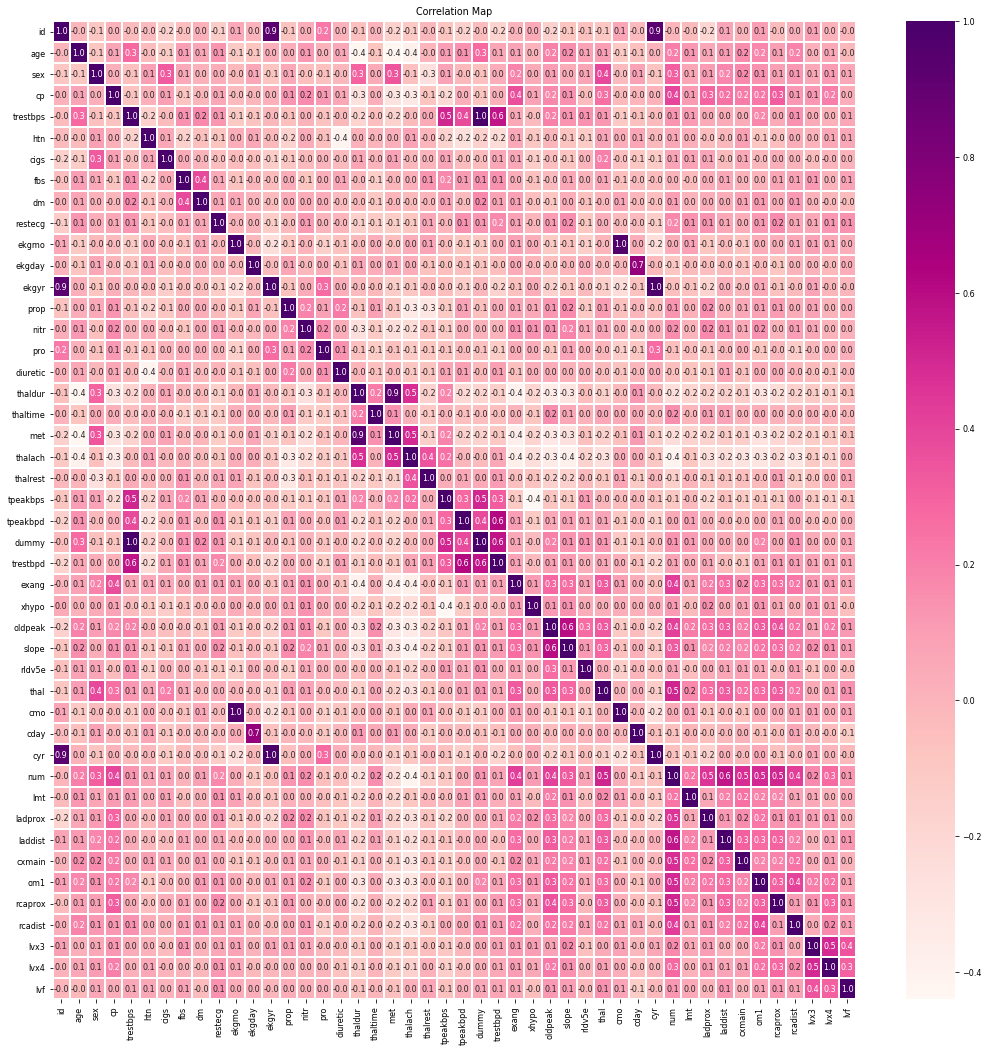

In [30]:
correlationMap(cleveland_data)

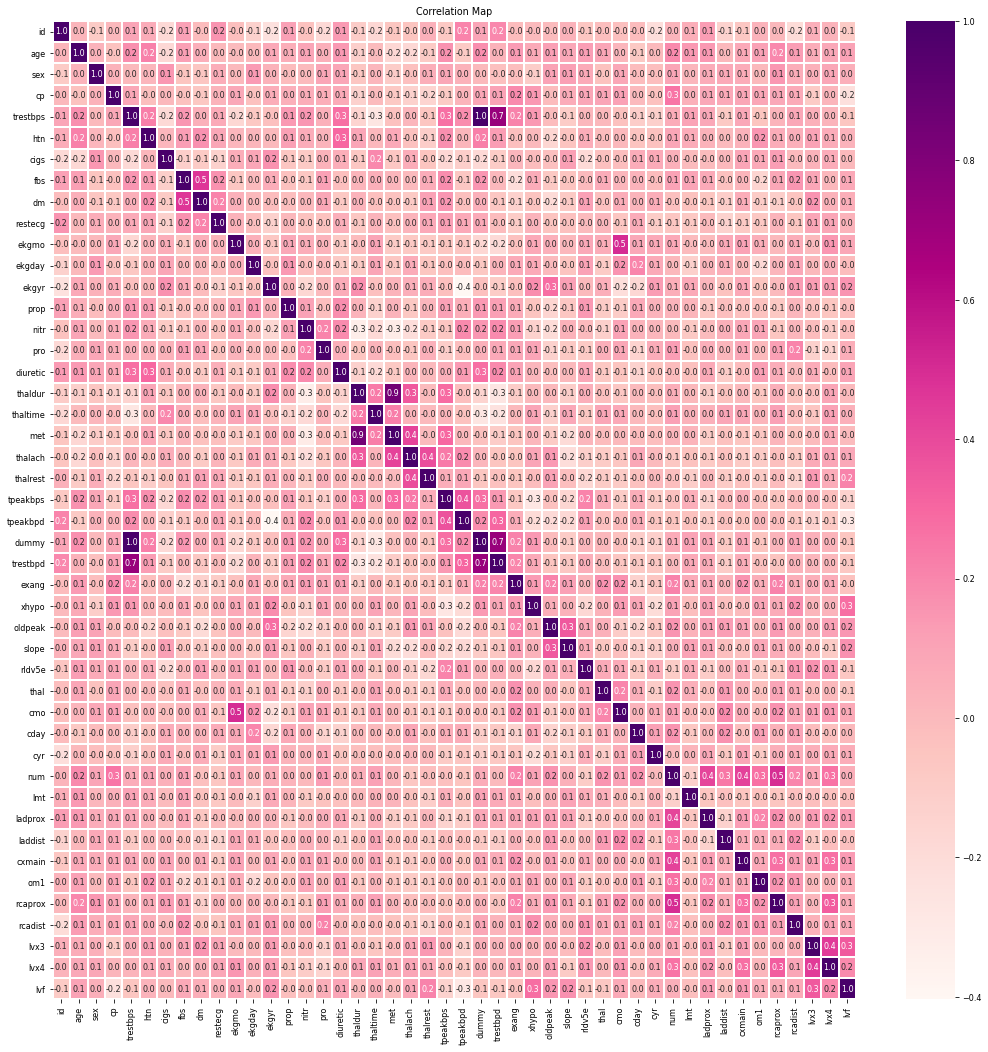

In [31]:
correlationMap(longBeach_data)

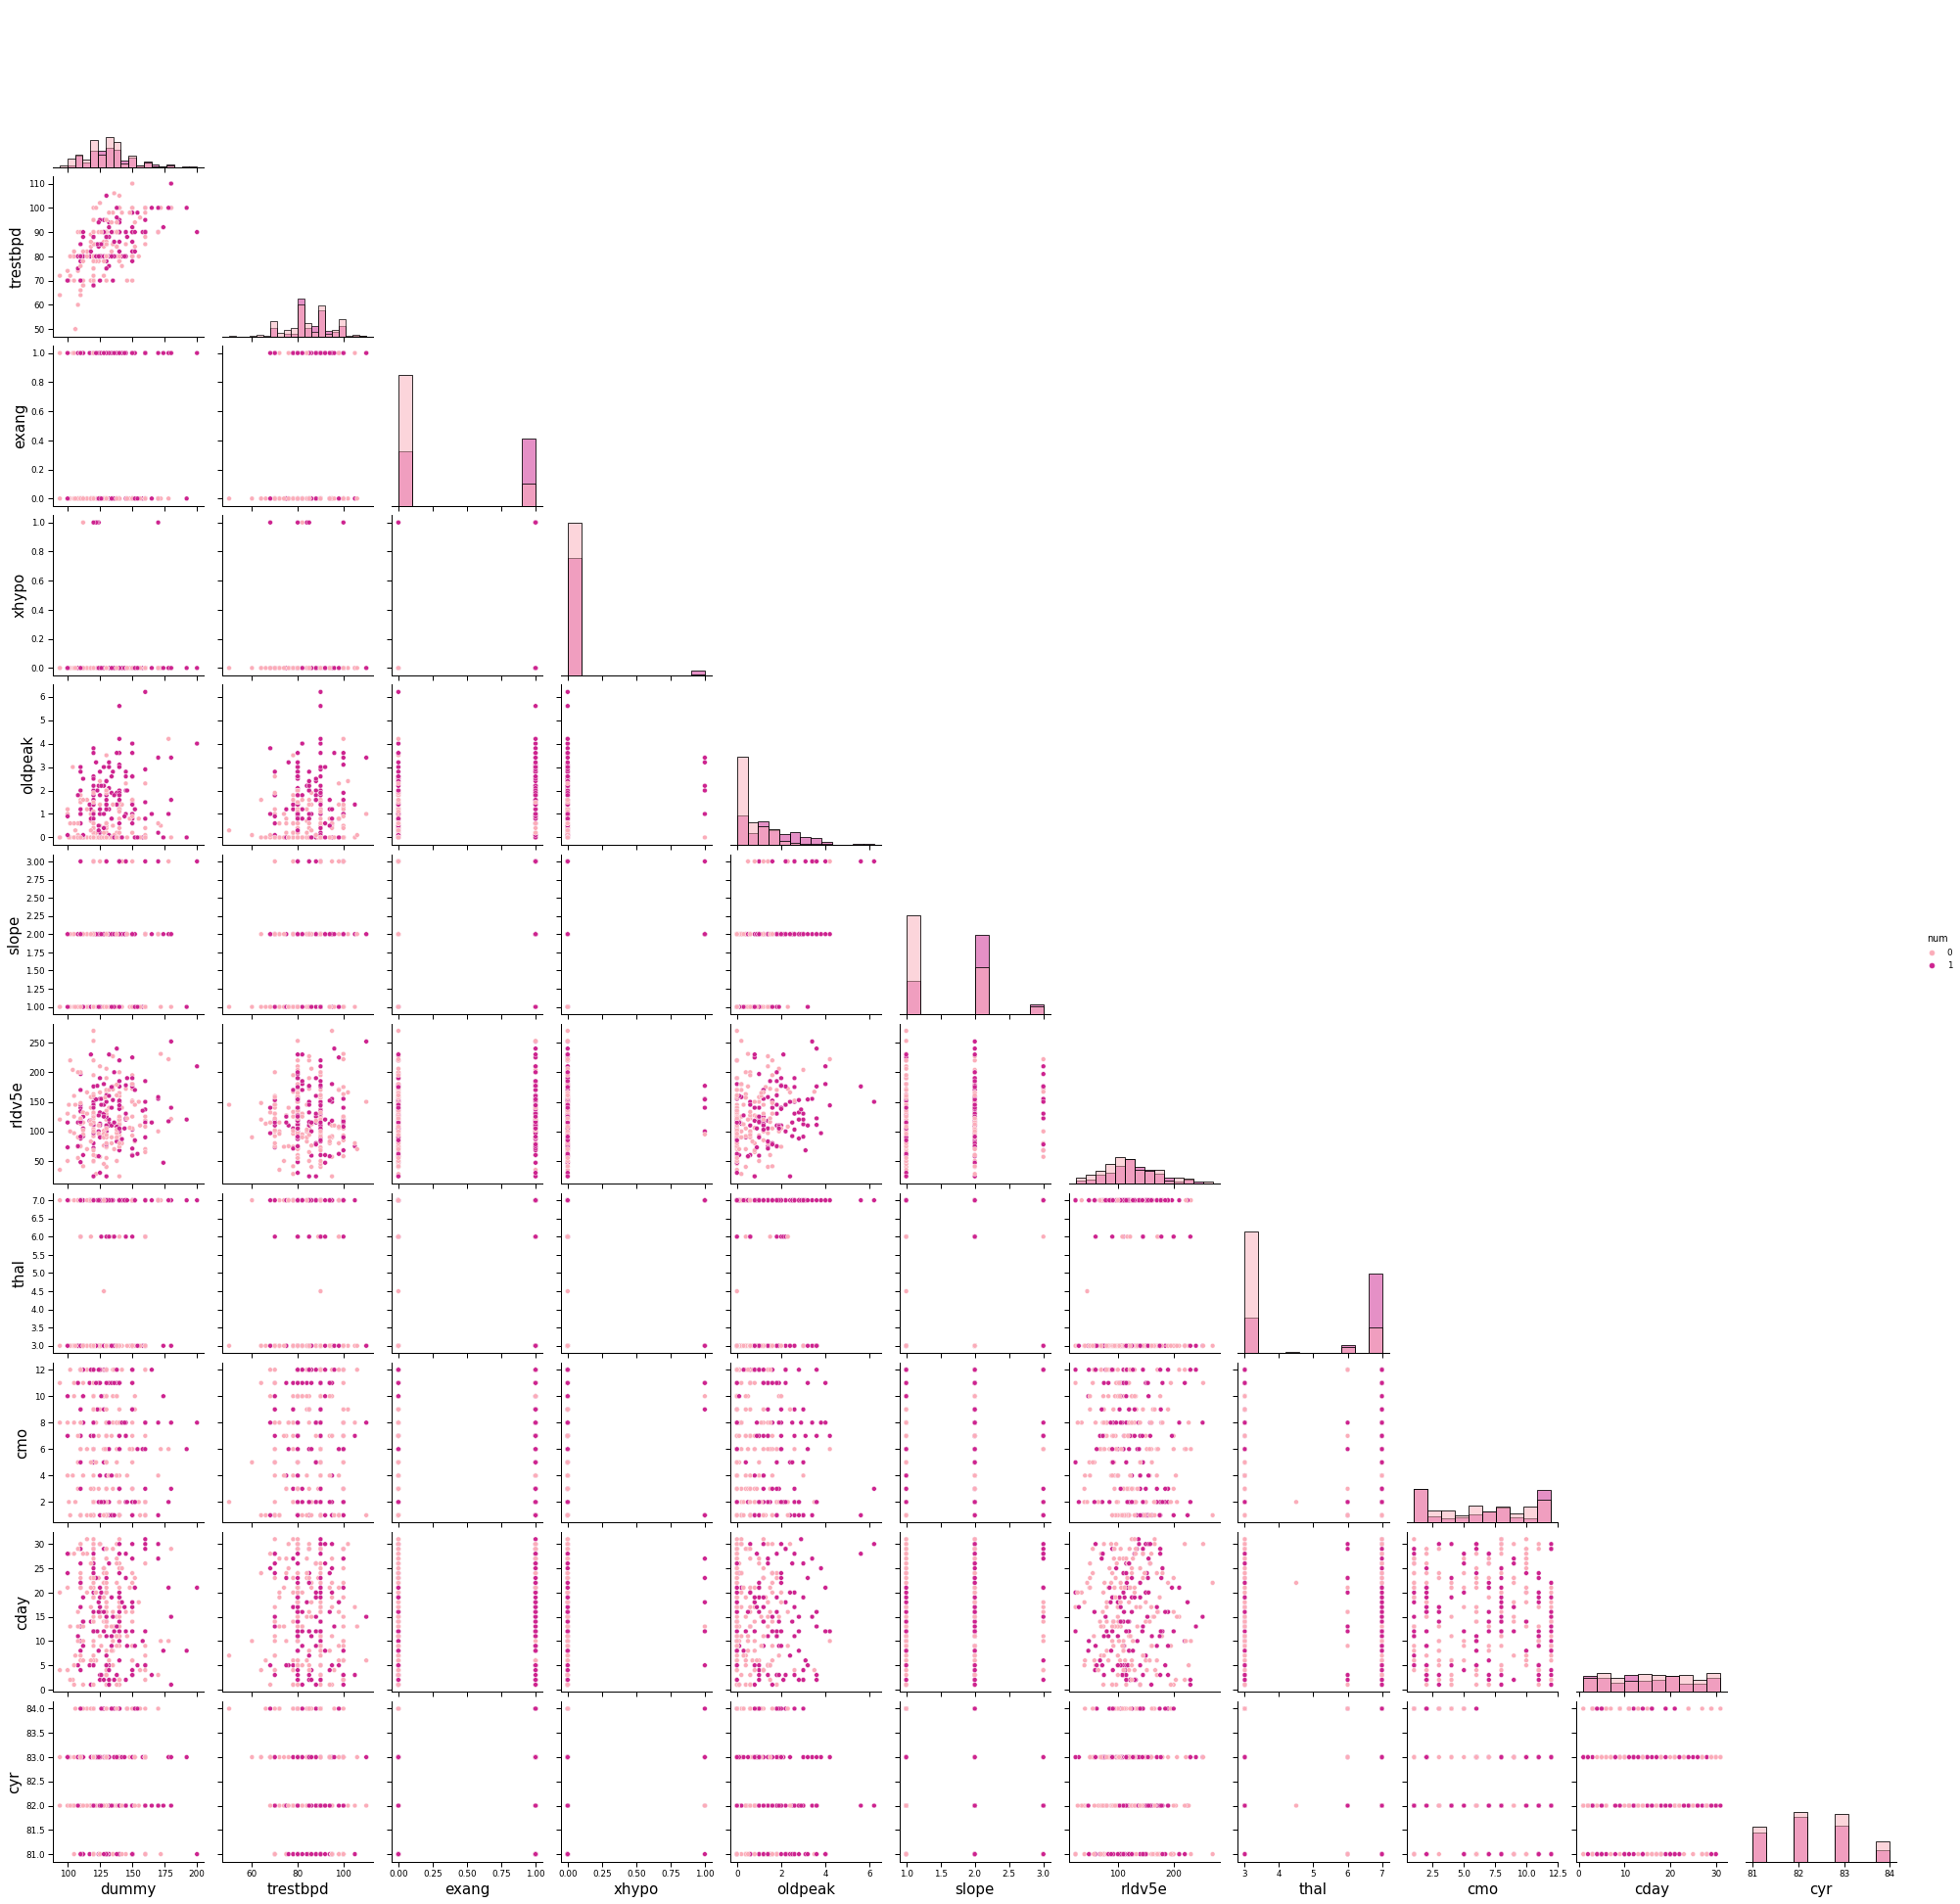

In [32]:
sns.set_context("paper", rc={"axes.labelsize":15})
sns.pairplot(cleveland_data.loc[:, 'dummy':'num'], palette="RdPu", hue='num', diag_kind="hist", corner=True)

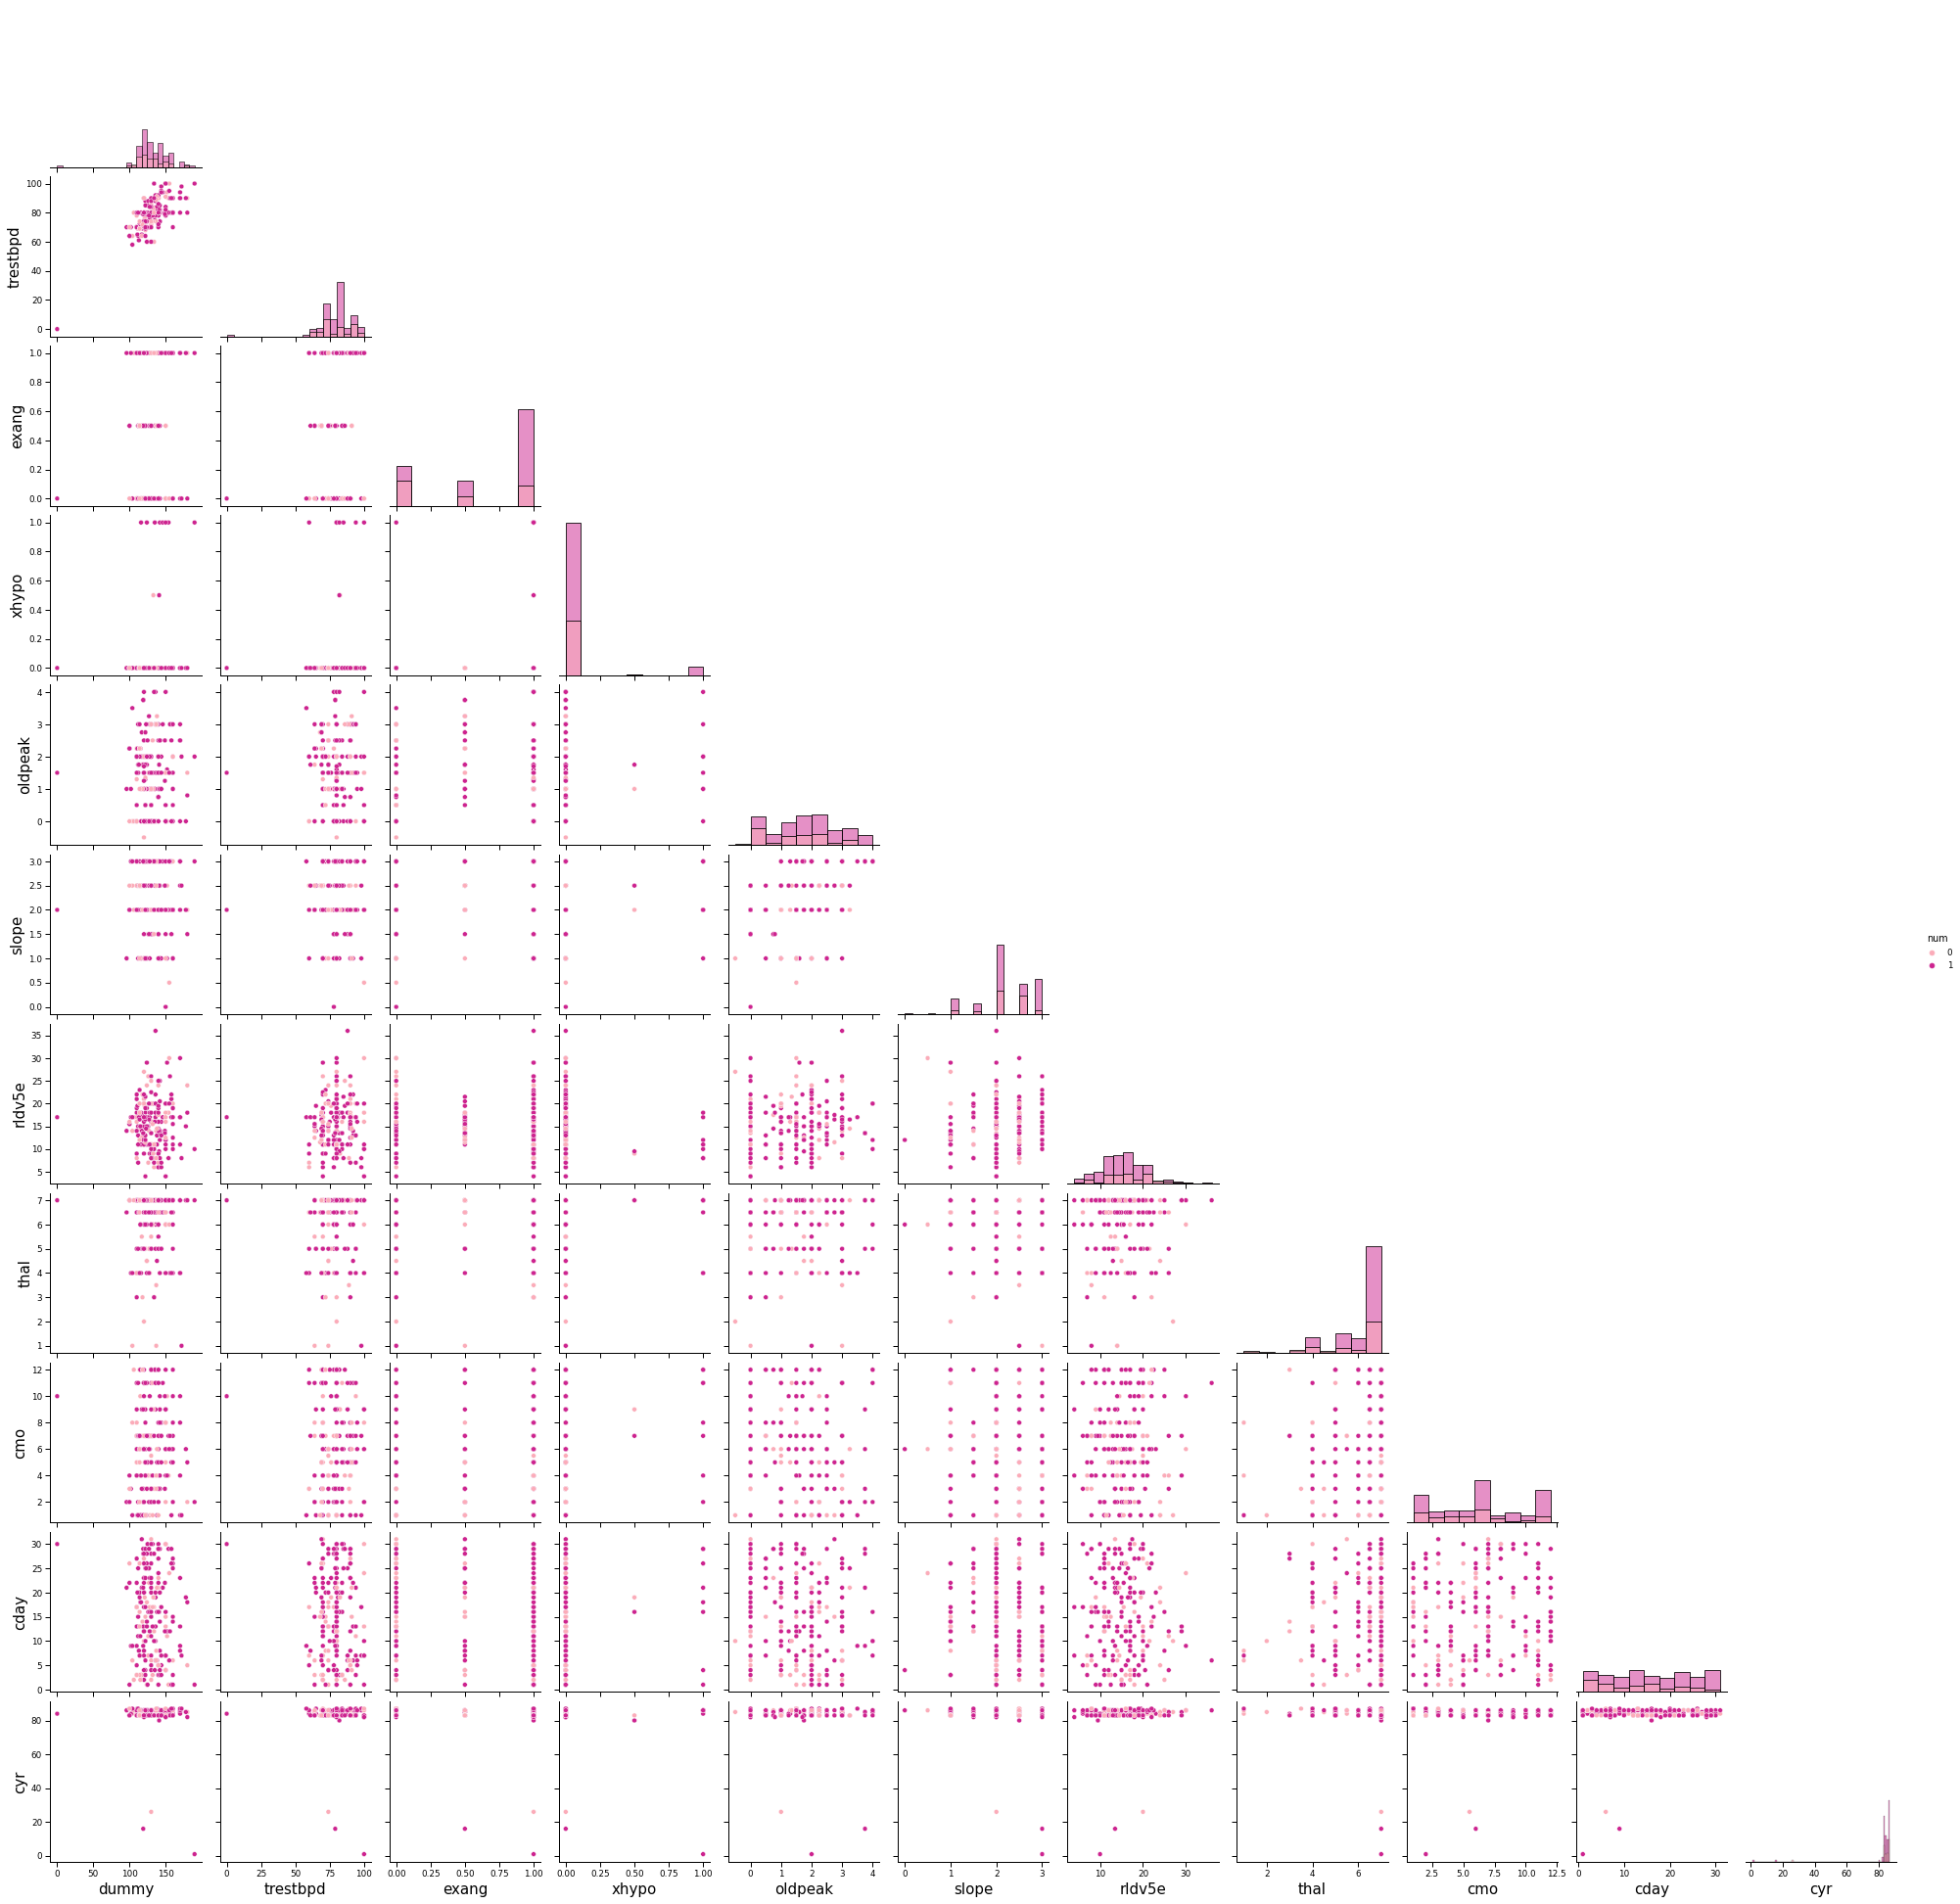

In [33]:
sns.set_context("paper", rc={"axes.labelsize":15})
sns.pairplot(longBeach_data.loc[:, 'dummy':'num'], palette="RdPu", hue='num', diag_kind="hist", corner=True)

<a id='Pre'></a>
## <span style="color:darkslateblue">3. Pre-processing of the Data Set</span>

### <span style="color:slateblue"> 3.1 Missing Values</span>

[done by Francesco on a separate python file. Data already corrected when imported into this notebook]

### <span style="color:slateblue"> 3.2 Outliers</span>


### <span style="color:slateblue"> 3.3 Class Balancing</span>
We will check if class balancing provides better performance results, since we could introduce bias in our analysis. By undersampling, since we do not have a big dataset, we would loos a huge quantity of data. Therefore, we will use a methdod for class balancing called **SMOTE**. It is an oversampling method that synthetically adds new samples for the minority class. 

As an example in 2D, for each observation that belongs to the under-represented class, the algorithm gets its K-nearest-neighbors and synthesizes a new instance of the minority label at a random location in the line between the current observation and its nearest neighbor. 


In [34]:
def classBalancing(df):
    y = df['num']
    df= df.drop(columns='num')
    X = df.loc[:, 'age':]
    sm = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=2)
    X_res, y_res = sm.fit_resample(X, y)
    X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, random_state = 2)

    #Train, Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)
    #Scale original data
    scaler = StandardScaler()
    X_train= scaler.fit_transform(X_train)
    X_test= scaler.fit_transform(X_test)
    #Scale balanced data
    X_train_res= scaler.fit_transform(X_train_res)
    X_test_res = scaler.fit_transform(X_test_res)
    lr = LogisticRegression(random_state=2, solver='liblinear')
    kn = KNeighborsClassifier()
    dt = DecisionTreeClassifier(random_state=2)
    nn = MLPClassifier(random_state=2)
    rf = RandomForestClassifier(random_state=2)

    models = [lr, kn, dt, nn, rf]
    models_names=['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', "Neural Network Classifier", "Random Forest Classifier"]

    train_accuracy = []
    cv_accuracy=[]
    test_accuracy=[]

    data=[[X_train, X_test, y_train, y_test], [X_train_res, X_test_res, y_train_res, y_test_res]]

    for dataset in data:

        train_accuracy_i=[]
        cv_accuracy_i=[]
        test_accuracy_i=[]

        for model in range(len(models)):
            model_ = clone(models[model])
            model_.fit(dataset[0], dataset[2])

            #--Train scores
            y_pred_train = model_.predict(dataset[0])
            train_accuracy_i.append(accuracy_score(dataset[2], y_pred_train))

            #--Validation scores
            cv_results = cross_validate(model_, dataset[0], dataset[2], scoring=["accuracy"] , return_train_score=True)
            cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))

            #--Test scores
            y_pred_test = model_.predict(dataset[1])
            test_accuracy_i.append(accuracy_score(dataset[3], y_pred_test))

        train_accuracy.append(train_accuracy_i)
        cv_accuracy.append(cv_accuracy_i)
        test_accuracy.append(test_accuracy_i)

    original_df = pd.DataFrame(list(zip(train_accuracy[0], cv_accuracy[0], test_accuracy[0])), columns=["Train Accuracy", "Validation Accuracy", "Test Accuracy"])
    original_df.index=models_names

    balanced_df = pd.DataFrame(list(zip(train_accuracy[1], cv_accuracy[1], test_accuracy[1])), columns=["Train Accuracy", "Validation Accuracy", "Test Accuracy"])
    balanced_df.index=models_names
    
    return X, original_df, balanced_df, X_train, X_test, y_train, y_test, y_pred_train, y_pred_test

In [35]:
XCl, orCl, balCl, X_trainCl, X_testCl, y_trainCl, y_testCl, y_pred_trainCl, y_pred_testCl = classBalancing(cleveland_data)
orCl.head()

,Train Accuracy,Validation Accuracy,Test Accuracy
Logistic Regression,1.000000,0.952824,0.985915
KNN Classifier,0.886256,0.834330,0.859155
Decision Tree Classifier,1.000000,0.924363,0.901408
Neural Network Classifier,1.000000,0.891362,0.915493
Random Forest Classifier,1.000000,0.924695,0.971831


In [36]:
balCl.head()

,Train Accuracy,Validation Accuracy,Test Accuracy
Logistic Regression,0.978723,0.927660,0.873418
KNN Classifier,0.897872,0.838298,0.810127
Decision Tree Classifier,1.000000,0.919149,0.822785
Neural Network Classifier,1.000000,0.897872,0.848101
Random Forest Classifier,1.000000,0.919149,0.911392


In [37]:
XLb, orLb, balLb, X_trainLb, X_testLb, y_trainLb, y_testLb, y_pred_trainLb, y_pred_testLb = classBalancing(longBeach_data)
orLb.head()

,Train Accuracy,Validation Accuracy,Test Accuracy
Logistic Regression,1.000000,0.893333,0.92
KNN Classifier,0.873333,0.820000,0.76
Decision Tree Classifier,1.000000,0.986667,0.92
Neural Network Classifier,1.000000,0.853333,0.88
Random Forest Classifier,1.000000,0.900000,0.92


In [38]:
balLb.head()

,Train Accuracy,Validation Accuracy,Test Accuracy
Logistic Regression,0.995516,0.946162,0.986667
KNN Classifier,0.838565,0.757677,0.733333
Decision Tree Classifier,1.000000,0.982020,0.960000
Neural Network Classifier,1.000000,0.923636,0.946667
Random Forest Classifier,1.000000,0.964040,0.986667


We will not use SMOTE for balancing, since the ratio is very small 54:46, and no improvement is sobserved in performance

<a id='Modelling'></a>
## <span style="color:darkslateblue">4. **Supervised or Unsupervised Learning**</span>


In [39]:
#Validation curve for Random Forest Classifier parameter "max_depth"
def validationCurveMD(X_train, y_train):
    param_range = np.arange(1,20,1)
    train_scores, test_scores = validation_curve(estimator= RandomForestClassifier(random_state=2), 
                                                 X=X_train, y=y_train,
                                                 cv=10, 
    param_name='max_depth', param_range=param_range)

    #
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    #
    # Plot the model scores (accuracy) against the paramater range
    #
    plt.plot(param_range, train_mean, 
             marker='o', markersize=5, 
             color='blue', label='Training Accuracy')
    plt.plot(param_range, test_mean, 
             marker='o', markersize=5, 
             color='green', label='Validation Accuracy')
    plt.xlabel('Parameter Maximum Depth')
    plt.ylabel('Accuracy')
    plt.xticks(param_range)
    plt.grid()
    plt.show()

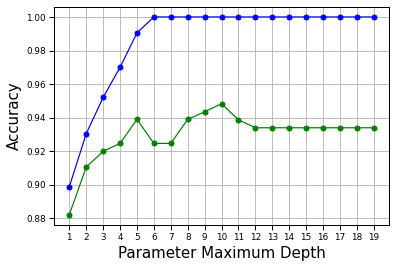

In [40]:
validationCurveMD(X_trainCl, y_trainCl)

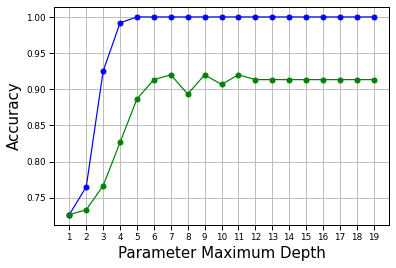

In [41]:
validationCurveMD(X_trainLb, y_trainLb)

In [42]:
#Validation curve for Random Forest Classifier parameter "min_samples_leaf"
def validationCurveMSL(X_train, y_train):    
    param_range = np.arange(1,50,1)
    train_scores, test_scores = validation_curve(estimator= RandomForestClassifier(random_state=2), 
                                                 X=X_train, y=y_train,
                                                 cv=10, 
    param_name='min_samples_leaf', param_range=param_range)

    #
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    #
    # Plot the model scores (accuracy) against the paramater range
    #
    plt.plot(param_range, train_mean, 
             marker='o', markersize=5, 
             color='blue', label='Training Accuracy')
    plt.plot(param_range, test_mean, 
             marker='o', markersize=5, 
             color='green', label='Validation Accuracy')
    plt.xlabel('Parameter Min Samples per Leaf')
    plt.ylabel('Accuracy')
    plt.xticks(param_range)
    plt.grid()
    plt.show()

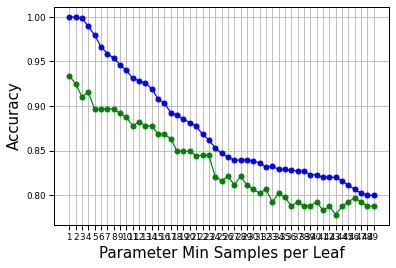

In [43]:
validationCurveMSL(X_trainCl, y_trainCl)

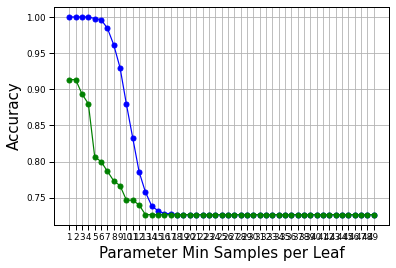

In [44]:
validationCurveMSL(X_trainLb, y_trainLb)

In [45]:
def Grid_Search_cv(model, X, y):
    
    grid = GridSearchCV(model, params, verbose = 0, cv = 5, n_jobs = -1, return_train_score = True)

    grid_results = grid.fit(X, y)
    
    return grid_results.best_estimator_.get_params()

In [46]:
model= RandomForestClassifier(random_state=2)
params={'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,4,1), "min_samples_leaf": np.arange(3,10,1)}
best_params_rf_Cl = Grid_Search_cv(model, X_trainCl, y_trainCl)
best_params_rf_Lb = Grid_Search_cv(model, X_trainLb, y_trainLb)
print('\033[1m' + 'Best parameter for ' + 'RF with Cleveland' +'\033[0m')
print(best_params_rf_Cl)
print('\033[1m' + 'Best parameter for ' + 'RF with Long Beach' +'\033[0m')
print(best_params_rf_Lb)

Best parameter for RF with Cleveland
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}
Best parameter for RF with Long Beach
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}


### Testing more models!

In [47]:
random_state=2

models_names=['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', "Neural Network Classifier", "Random Forest Classifier"]


clfs= [LogisticRegression(solver='liblinear', random_state=random_state), KNeighborsClassifier(),
       DecisionTreeClassifier(random_state=random_state),MLPClassifier(random_state=random_state), RandomForestClassifier(random_state=2)]

params={0: {'penalty':['l1', 'l2'], 'C': np.arange(0.01, 0.2, 0.01)}, 
       1: {'n_neighbors':np.arange(5, 10, 1), 'metric':['euclidean','manhattan'], 'weights': ['uniform', 'distance']},
       2: {'criterion':['gini', 'entropy'], 'max_depth':np.arange(2,4,1), 'min_samples_leaf': np.arange(10,20,1)}, 
       3: {'hidden_layer_sizes': [(22,), (22, 22)], 'solver':['sgd', 'adam'], 'activation':['logistic', 'tanh', 'relu']},
       4: {'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,4,1), "min_samples_leaf": np.arange(3,10,1)}}

def Grid_Search_cv(model_index, X, y):
    
    grid = GridSearchCV(clfs[model_index], params[model_index], verbose = 0, cv = 5, n_jobs = -1, return_train_score = True)

    grid_results = grid.fit(X, y)
    
    return grid_results.best_estimator_.get_params()

def BestParameters(X_train, y_train, name):
    best_params_lr = Grid_Search_cv(0, X_train, y_train)
    best_params_kn = Grid_Search_cv(1, X_train, y_train)
    best_params_dt = Grid_Search_cv(2, X_train, y_train)
    best_params_nn = Grid_Search_cv(3, X_train, y_train)
    best_params_rf = Grid_Search_cv(4, X_train, y_train)

    best_params =[best_params_lr, best_params_kn, best_params_dt, best_params_nn, best_params_rf]

    for i in range(len(models_names)):
        print(" ")
        print('\033[1m' + 'Best parameter in ' +name+' for ' + str(models_names[i]) +'\033[0m')
        print(best_params[i])
    return best_params

In [48]:
best_paramsCl = BestParameters(X_trainCl, y_trainCl, 'Cleveland')

 
Best parameter in Cleveland for Logistic Regression
{'C': 0.09999999999999999, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
 
Best parameter in Cleveland for KNN Classifier
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
 
Best parameter in Cleveland for Decision Tree Classifier
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2, 'splitter': 'best'}
 
Best parameter in Cleveland for Neural Network Classifier
{'activation': 'tanh', 'alpha

In [49]:
best_paramsLb = BestParameters(X_trainLb, y_trainLb, 'Long Beach')

 
Best parameter in Long Beach for Logistic Regression
{'C': 0.12, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
 
Best parameter in Long Beach for KNN Classifier
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
 
Best parameter in Long Beach for Decision Tree Classifier
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2, 'splitter': 'best'}
 
Best parameter in Long Beach for Neural Network Classifier
{'activation': 'tanh', 'alpha': 0.0001, 'bat

In [50]:
def modelEvaluation(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test, best_params):    
    train_accuracy=[]
    train_recall=[]
    train_precision=[]
    train_f1=[]

    cv_accuracy=[]
    cv_precision=[]
    cv_recall=[]
    cv_f1=[]

    test_accuracy=[]
    test_precision=[]
    test_recall=[]
    test_f1=[]

    for ix in range(len(models_names)):

        original_model=clone(clfs[ix])

        optimized_model=clone(clfs[ix]).set_params(**best_params[ix])

        models=[optimized_model, original_model]

        for model in models:

            model = clone(model)

            model.fit(X_train, y_train)

            #--Train scores
            y_pred_train = model.predict(X_train)
            train_accuracy.append(accuracy_score(y_train, y_pred_train))
            train_recall.append(recall_score(y_train, y_pred_train))
            train_precision.append(precision_score(y_train, y_pred_train))
            train_f1.append(f1_score(y_train, y_pred_train))

            #--Validation scores
            cv_results = cross_validate(model, X_train, y_train, scoring=["accuracy", "recall", "precision", "f1"])
            cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
            cv_recall.append(abs(np.mean(cv_results['test_recall'])))
            cv_precision.append(abs(np.mean(cv_results['test_precision'])))
            cv_f1.append(abs(np.mean(cv_results['test_f1'])))

            #--Test scores
            y_pred_test = model.predict(X_test)
            test_accuracy.append(accuracy_score(y_test, y_pred_test))
            test_recall.append(recall_score(y_test, y_pred_test))
            test_precision.append(precision_score(y_test, y_pred_test))
            test_f1.append(f1_score(y_test, y_pred_test))

    index_names=['Logistic Regression Tuned', 'Logistic Regression', 'KNN Classifier Tuned', 'KNN Classifier', 
        'Decision Tree Classifier Tuned', 'Decision Tree Classifier', 'Neural Network Classifier Tuned', 'Neural Network Classifier',
        'Random Forest Classifier Tuned', 'Random Forest Classifier'
        ]

    ht_results = pd.DataFrame(list(zip(train_accuracy, train_recall, train_precision, train_f1, cv_accuracy, cv_recall,
                                      cv_precision, cv_f1, test_accuracy, test_recall, test_precision, test_f1)), columns=["Train Accuracy",
                                                                                                           "Train Recall", "Train Precision", "Train F1", 
                                                                                                           "Validation Accuracy", "Validation Recall", 
                                                                                                           "Validation Precision","Validation F1", "Test Accuracy", 
                                                                                                           "Test Recall", "Test Precision", "Test F1"])
    ht_results.index=index_names

    return ht_results

In [51]:
ht_resultsCl = modelEvaluation(X_trainCl, X_testCl, y_trainCl, y_testCl, y_pred_trainCl, y_pred_testCl, best_paramsCl)
ht_resultsCl

,Train Accuracy,Train Recall,Train Precision,Train F1,Validation Accuracy,Validation Recall,Validation Precision,Validation F1,Test Accuracy,Test Recall,Test Precision,Test F1
Logistic Regression Tuned,0.976303,0.948980,1.000000,0.973822,0.938538,0.868421,1.000000,0.928829,0.957746,0.888889,1.000000,0.941176
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.952824,0.898947,1.000000,0.945623,0.985915,0.962963,1.000000,0.981132
KNN Classifier Tuned,1.000000,1.000000,1.000000,1.000000,0.834441,0.644211,1.000000,0.780682,0.873239,0.666667,1.000000,0.800000
KNN Classifier,0.886256,0.755102,1.000000,0.860465,0.834330,0.644211,1.000000,0.781708,0.859155,0.629630,1.000000,0.772727
Decision Tree Classifier Tuned,0.928910,0.846939,1.000000,0.917127,0.854153,0.776842,0.918182,0.837659,0.901408,0.740741,1.000000,0.851064
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,0.924363,0.918421,0.923103,0.918192,0.901408,0.925926,0.833333,0.877193
Neural Network Classifier Tuned,1.000000,1.000000,1.000000,1.000000,0.924585,0.858421,0.976471,0.912897,0.971831,0.925926,1.000000,0.961538
Neural Network Classifier,1.000000,1.000000,1.000000,1.000000,0.891362,0.838421,0.924624,0.878018,0.915493,0.925926,0.862069,0.892857
Random Forest Classifier Tuned,0.952607,0.908163,0.988889,0.946809,0.924695,0.858947,0.975188,0.910267,0.943662,0.851852,1.000000,0.920000
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000,0.924695,0.879474,0.954474,0.913159,0.971831,0.925926,1.000000,0.961538


In [52]:
ht_resultsLb = modelEvaluation(X_trainLb, X_testLb, y_trainLb, y_testLb, y_pred_trainLb, y_pred_testLb, best_paramsLb)
ht_resultsLb

,Train Accuracy,Train Recall,Train Precision,Train F1,Validation Accuracy,Validation Recall,Validation Precision,Validation F1,Test Accuracy,Test Recall,Test Precision,Test F1
Logistic Regression Tuned,0.973333,0.963303,1.000000,0.981308,0.973333,0.963203,1.000000,0.980947,0.94,0.925,1.000000,0.961039
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.893333,0.870996,0.980952,0.920748,0.92,0.925,0.973684,0.948718
KNN Classifier Tuned,0.880000,0.917431,0.917431,0.917431,0.860000,0.898701,0.910902,0.902732,0.84,0.825,0.970588,0.891892
KNN Classifier,0.873333,0.880734,0.941176,0.909953,0.820000,0.853680,0.899948,0.871434,0.76,0.750,0.937500,0.833333
Decision Tree Classifier Tuned,0.926667,0.899083,1.000000,0.946860,0.893333,0.853680,1.000000,0.916032,0.90,0.875,1.000000,0.933333
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,0.986667,0.981385,1.000000,0.990471,0.92,0.950,0.950000,0.950000
Neural Network Classifier Tuned,0.993333,0.990826,1.000000,0.995392,0.860000,0.834199,0.967600,0.894944,0.84,0.825,0.970588,0.891892
Neural Network Classifier,1.000000,1.000000,1.000000,1.000000,0.853333,0.880519,0.918426,0.897372,0.88,0.900,0.947368,0.923077
Random Forest Classifier Tuned,0.946667,1.000000,0.931624,0.964602,0.786667,1.000000,0.773691,0.872239,0.90,0.975,0.906977,0.939759
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000,0.900000,0.972294,0.901839,0.934431,0.92,0.925,0.973684,0.948718


<a id='Feature'></a>
## <span style="color:darkslateblue">5. **Feature Selection and Extraction**</span>

In this section we will compare performance metrics applying two types of feature selection methods:
1. [**Filter Methods**: F1-Score](#F1)
2. [**Filter Methods**: Mutual Information](#MI)

<a id='F1'></a>
#### <span style="color:#DB8AC4">5.1.1 Filter Methods: F1-Score</span>

In [53]:
def selectionF1(X, X_train, y_train, name):    
    cv_accuracy=[]
    cv_f1=[]

    for model in [0,3]:

        cv_accuracy_i=[]
        cv_f1_i=[]

        for k in np.arange(1,len(X.columns)+1):

            #Select K best features
            selector = SelectKBest(score_func=f_regression, k=k)
            #Fit selector with train data
            new_data = selector.fit(X_train, y_train)

            #Obtain most relevant column indices
            cols_index = selector.get_support(indices = True)
            cols = [i for i in X.columns[cols_index]]
            #F-test scores
            score = selector.scores_
            score /= np.max(score)

            lr_s = clone(clfs[model]).set_params()
            lr_s.fit(X_train[:, cols_index], y_train)

            #CV scores
            cv_results = cross_validate(lr_s, X_train[:, cols_index], y_train, scoring=["f1", "accuracy"])
            cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))
            cv_f1_i.append(abs(np.mean(cv_results['test_f1'])))

        cv_accuracy.append(cv_accuracy_i)
        cv_f1.append(cv_accuracy_i)

    fig,axes =plt.subplots(2,2, figsize=(20,10))

    x = np.arange(1,X.shape[1]+1)
    a1 = sns.pointplot(x=x, y=cv_accuracy[0], color='#BF5A96', ax=axes[0,0] )
    a2 = sns.pointplot(x=x, y=cv_f1[0], color='#BF5A96', ax=axes[0,1])
    a3 = sns.pointplot(x=x, y=cv_accuracy[1], color='#BF5A96', ax=axes[1,0])
    a4 = sns.pointplot(x=x, y=cv_f1[1], color='#BF5A96', ax=axes[1,1])


    a1.set(xlabel='# features', ylabel='accuracy', title="Logistic Regression")
    a2.set(xlabel='# features', ylabel='f1', title="Logistic Regression")
    a3.set(xlabel='# features', ylabel='accuracy', title="Neural Network")
    a4.set(xlabel='# features', ylabel='f1', title="Neural Network")

    plt.xticks()
    #Print best result
    print("\033[1m\nThe number of features which provides the highest accuracy for Logistic Regression in "+name+" is:\033[0m", cv_accuracy[0].index(max(cv_accuracy[0])) + 1)
    print("\033[1m\nThe number of features which provides the highest F1 for Logistic Regression in "+name+" is:\033[0m", cv_f1[0].index(max(cv_f1[0])) + 1)

    #Print best result
    print("\033[1m\nThe number of features which provides the highest accuracy for Neural Networks in "+name+" is:\033[0m", cv_accuracy[1].index(max(cv_accuracy[1])) + 1)
    print("\033[1m\nThe number of features which provides the highest F1 for Neural Networks in "+name+" is:\033[0m", cv_f1[1].index(max(cv_f1[1])) + 1)


The number of features which provides the highest accuracy for Logistic Regression in Cleveland is: 8

The number of features which provides the highest F1 for Logistic Regression in Cleveland is: 8

The number of features which provides the highest accuracy for Neural Networks in Cleveland is: 8

The number of features which provides the highest F1 for Neural Networks in Cleveland is: 8


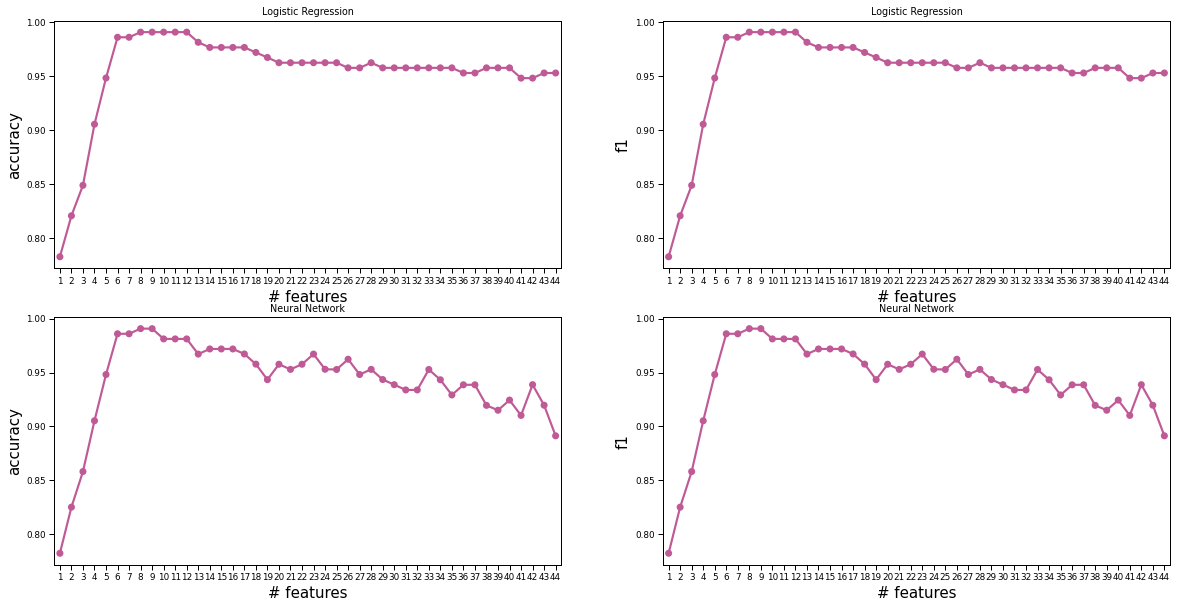

In [54]:
selectionF1(XCl, X_trainCl, y_trainCl, 'Cleveland')


The number of features which provides the highest accuracy for Logistic Regression in Long beach is: 7

The number of features which provides the highest F1 for Logistic Regression in Long beach is: 7

The number of features which provides the highest accuracy for Neural Networks in Long beach is: 12

The number of features which provides the highest F1 for Neural Networks in Long beach is: 12


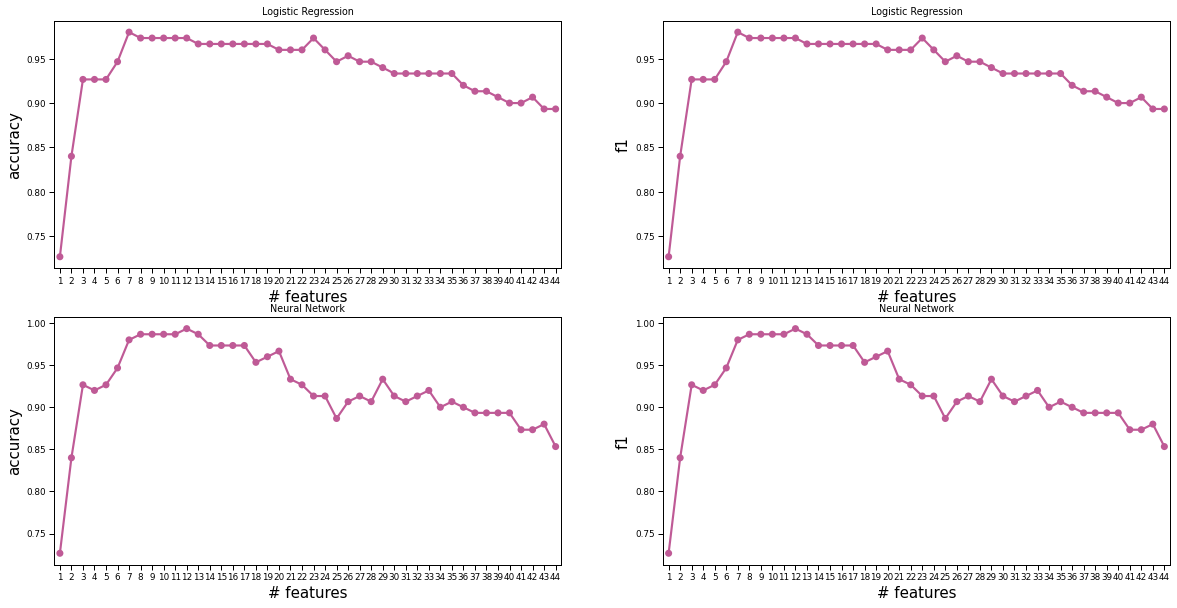

In [55]:
selectionF1(XLb, X_trainLb, y_trainLb, 'Long beach')

In [56]:
#--Obtain transformed X_train, X_test
def transformTrainTestF1(X, X_train, y_train, X_test):
    #Select K best features
    selector = SelectKBest(score_func=f_regression, k=5)
    #Fit selector with train data
    new_data = selector.fit(X_train, y_train)

    #Obtain most relevant column indices
    cols_index = selector.get_support(indices = True)
    cols = [i for i in X.columns[cols_index]]
    non_relevant = [i for i in X.columns if i not in cols]

    #F-test scores
    score = selector.scores_
    score /= np.max(score)

    #Ranking
    ranking_fs=np.argsort(-score)
    ranking_fs=[i for i in X.columns[ranking_fs]]
    ranking_fs= pd.DataFrame([ranking_fs], columns=np.arange(1,X.shape[1]+1), index=['ranking']).T

    bag_names = []
    for name in X.columns:
        if name not in cols:
            bag_names.append('No')
        else:
            bag_names.append('Yes')

    f_regression_features = pd.DataFrame([bag_names], columns=X.columns, index=['selected'])

    X_train_fs, X_test_fs = X_train[:, cols_index], X_test[:, cols_index]
    
    return f_regression_features, ranking_fs, X_train_fs, X_test_fs, cols

In [57]:
f_regression_featuresCl, ranking_fsCl, X_train_fsCl, X_test_fsCl, colsSelectedClF1 = transformTrainTestF1(XCl, X_trainCl, y_trainCl, X_testCl)
f_regression_featuresCl

,age,sex,cp,trestbps,htn,cigs,fbs,dm,restecg,ekgmo,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
selected,No,No,No,No,No,No,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,No


In [58]:
f_regression_featuresLb, ranking_fsLb, X_train_fsLb, X_test_fsLb, colsSelectedLbF1 = transformTrainTestF1(XLb, X_trainLb, y_trainLb, X_testLb)
f_regression_featuresLb

,age,sex,cp,trestbps,htn,cigs,fbs,dm,restecg,ekgmo,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
selected,Yes,No,No,No,No,No,No,No,No,No,...,No,Yes,No,Yes,No,Yes,No,No,Yes,No


In [59]:
ranking_fsCl

,ranking
1,thal
2,laddist
3,rcaprox
4,om1
5,cxmain
6,ladprox
7,exang
8,rcadist
9,oldpeak
10,thalach


In [60]:
ranking_fsLb

,ranking
1,rcaprox
2,ladprox
3,cxmain
4,lvx4
5,age
6,om1
7,laddist
8,cp
9,exang
10,rcadist


In [80]:
def modelEvaluationfs(X_train, X_train_fs, X_test, X_test_fs, y_train, y_test, y_pred_train, y_pred_test, best_params):    
    train_accuracy=[]
    train_recall=[]
    train_precision=[]
    train_f1=[]

    cv_accuracy=[]
    cv_precision=[]
    cv_recall=[]
    cv_f1=[]

    test_accuracy=[]
    test_precision=[]
    test_recall=[]
    test_f1=[]

    datasets=[[X_train_fs, X_test_fs], [X_train, X_test]]

    for ix in range(len(models_names)):

        original_model=clone(clfs[ix])    
        flag = 0
        for dataset in datasets:

            original_model.fit(dataset[0], y_train)

            #--Train scores
            y_pred_train = original_model.predict(dataset[0])
            train_accuracy.append(accuracy_score(y_train, y_pred_train))
            train_recall.append(recall_score(y_train, y_pred_train))
            train_precision.append(precision_score(y_train, y_pred_train))
            train_f1.append(f1_score(y_train, y_pred_train))

            #--Validation scores
            cv_results = cross_validate(original_model, dataset[0], y_train, scoring=["accuracy", "recall", "precision", "f1"] , return_train_score=True)
            cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
            cv_recall.append(abs(np.mean(cv_results['test_recall'])))
            cv_precision.append(abs(np.mean(cv_results['test_precision'])))
            cv_f1.append(abs(np.mean(cv_results['test_f1'])))

            #--Test scores
            y_pred_test = original_model.predict(dataset[1])
            test_accuracy.append(accuracy_score(y_test, y_pred_test))
            test_recall.append(recall_score(y_test, y_pred_test))
            test_precision.append(precision_score(y_test, y_pred_test))
            test_f1.append(f1_score(y_test, y_pred_test))
            
            #--Confusion matrix
            y_testList = y_test.tolist()
            cf = confusion_matrix(y_testList, y_pred_test) 
            ax = sns.heatmap(cf, annot=True, cmap='Blues')
            
            if (flag==0):
                ax.set_title('Confusion Matrix of '+type(original_model).__name__+' with selected features');
            else:
                ax.set_title('Confusion Matrix of '+type(original_model).__name__);
            ax.set_xlabel('\nPredicted Values')
            ax.set_ylabel('Actual Values ');

            ## Ticket labels - List must be in alphabetical order
            ax.xaxis.set_ticklabels(['False','True'])
            ax.yaxis.set_ticklabels(['False','True'])

            ## Display the visualization of the Confusion Matrix.
            plt.show()
            flag = flag + 1
            
    index_names=['Logistic Regression FS', 'Logistic Regression', 'KNN Classifier FS', 'KNN Classifier', 
                'Decision Tree Classifier FS', 'Decision Tree Classifier', 'Neural Network Classifier FS', 'Neural Network Classifier',
                 'Random Forest Classifier FS', 'Random Forest Classifier'
                ]

    fs_results = pd.DataFrame(list(zip(train_accuracy, train_recall, train_precision, train_f1, cv_accuracy, cv_recall,
                                      cv_precision, cv_f1, test_accuracy, test_recall, test_precision, test_f1)), columns=["Train Accuracy",
                                                                                                           "Train Recall", "Train Precision", "Train F1", 
                                                                                                           "Validation Accuracy", "Validation Recall", 
                                                                                                           "Validation Precision","Validation F1", "Test Accuracy", 
                                                                                                           "Test Recall", "Test Precision", "Test F1"])
    fs_results.index=index_names

    return fs_results


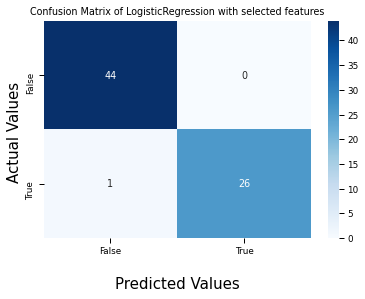

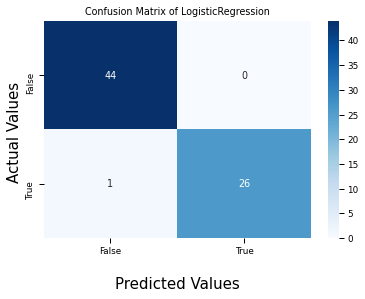

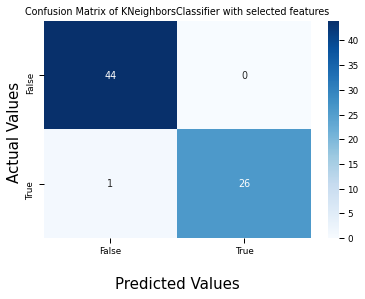

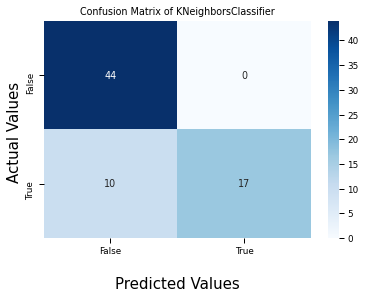

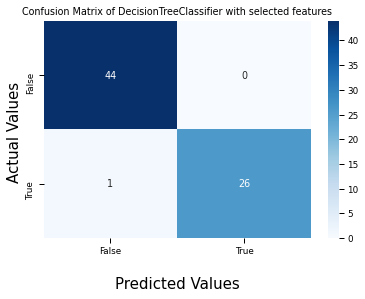

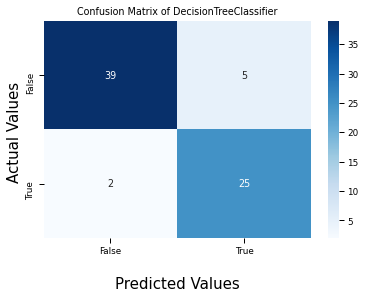

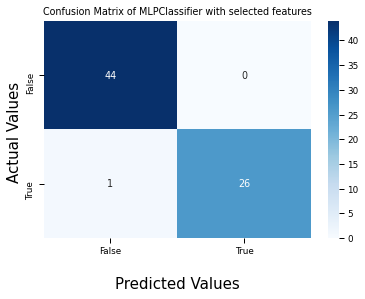

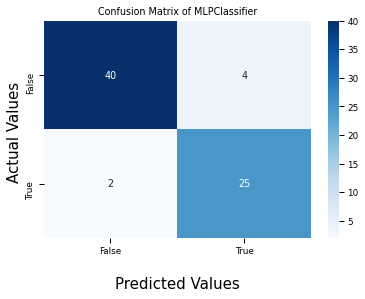

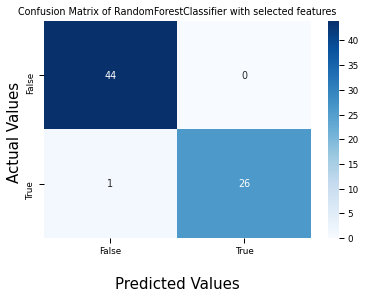

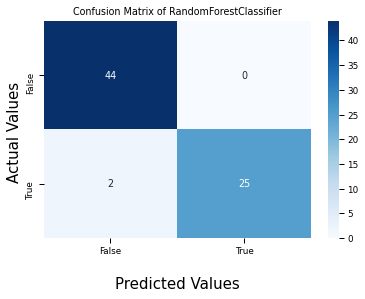

,Train Accuracy,Train Recall,Train Precision,Train F1,Validation Accuracy,Validation Recall,Validation Precision,Validation F1,Test Accuracy,Test Recall,Test Precision,Test F1
Logistic Regression FS,0.947867,0.887755,1.0,0.940541,0.948173,0.887895,1.000000,0.938354,0.985915,0.962963,1.000000,0.981132
Logistic Regression,1.000000,1.000000,1.0,1.000000,0.952824,0.898947,1.000000,0.945623,0.985915,0.962963,1.000000,0.981132
KNN Classifier FS,0.947867,0.887755,1.0,0.940541,0.943522,0.887895,0.987500,0.933592,0.985915,0.962963,1.000000,0.981132
KNN Classifier,0.886256,0.755102,1.0,0.860465,0.834330,0.644211,1.000000,0.781708,0.859155,0.629630,1.000000,0.772727
Decision Tree Classifier FS,0.947867,0.887755,1.0,0.940541,0.943411,0.877368,1.000000,0.931967,0.985915,0.962963,1.000000,0.981132
Decision Tree Classifier,1.000000,1.000000,1.0,1.000000,0.924363,0.918421,0.923103,0.918192,0.901408,0.925926,0.833333,0.877193
Neural Network Classifier FS,0.947867,0.887755,1.0,0.940541,0.948173,0.887895,1.000000,0.938354,0.985915,0.962963,1.000000,0.981132
Neural Network Classifier,1.000000,1.000000,1.0,1.000000,0.891362,0.838421,0.924624,0.878018,0.915493,0.925926,0.862069,0.892857
Random Forest Classifier FS,0.947867,0.887755,1.0,0.940541,0.948173,0.887895,1.000000,0.938354,0.985915,0.962963,1.000000,0.981132
Random Forest Classifier,1.000000,1.000000,1.0,1.000000,0.924695,0.879474,0.954474,0.913159,0.971831,0.925926,1.000000,0.961538


In [81]:
fs_resultsCl = modelEvaluationfs(X_trainCl, X_train_fsCl, X_testCl, X_test_fsCl, y_trainCl, y_testCl, y_pred_trainCl, y_pred_testCl, best_paramsCl)
fs_resultsCl

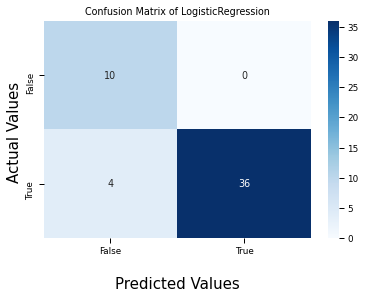

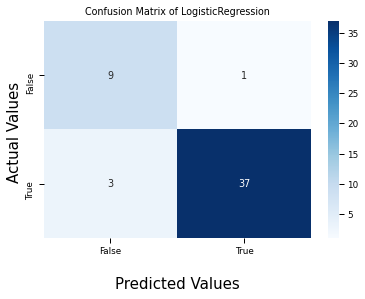

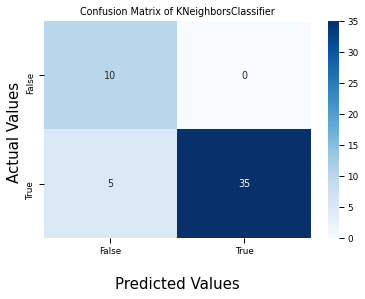

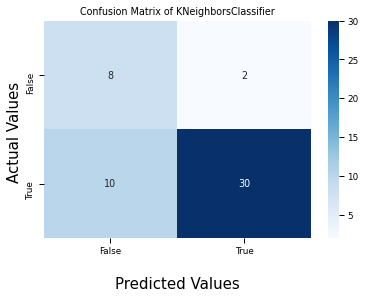

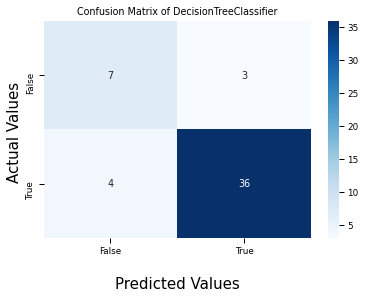

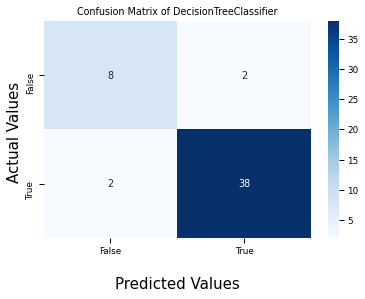

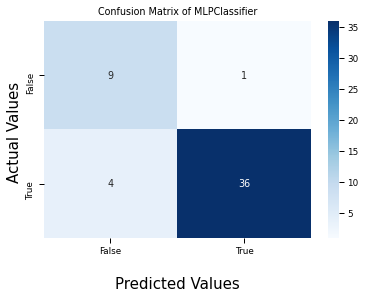

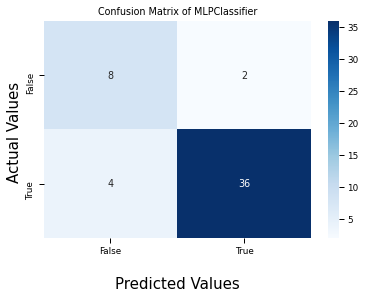

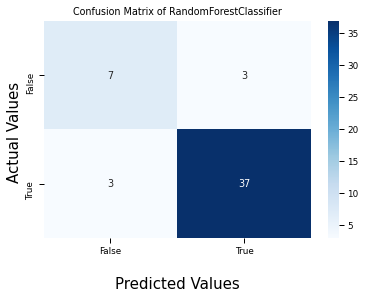

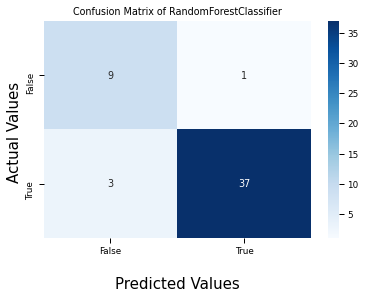

,Train Accuracy,Train Recall,Train Precision,Train F1,Validation Accuracy,Validation Recall,Validation Precision,Validation F1,Test Accuracy,Test Recall,Test Precision,Test F1
Logistic Regression FS,0.926667,0.899083,1.000000,0.946860,0.926667,0.899134,1.000000,0.945842,0.92,0.900,1.000000,0.947368
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.893333,0.870996,0.980952,0.920748,0.92,0.925,0.973684,0.948718
KNN Classifier FS,0.933333,0.926606,0.980583,0.952830,0.920000,0.908225,0.981304,0.942350,0.90,0.875,1.000000,0.933333
KNN Classifier,0.873333,0.880734,0.941176,0.909953,0.820000,0.853680,0.899948,0.871434,0.76,0.750,0.937500,0.833333
Decision Tree Classifier FS,0.966667,0.963303,0.990566,0.976744,0.913333,0.917749,0.963123,0.938396,0.86,0.900,0.923077,0.911392
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,0.986667,0.981385,1.000000,0.990471,0.92,0.950,0.950000,0.950000
Neural Network Classifier FS,0.933333,0.908257,1.000000,0.951923,0.926667,0.908658,0.991304,0.946520,0.90,0.900,0.972973,0.935065
Neural Network Classifier,1.000000,1.000000,1.000000,1.000000,0.853333,0.880519,0.918426,0.897372,0.88,0.900,0.947368,0.923077
Random Forest Classifier FS,0.966667,0.963303,0.990566,0.976744,0.920000,0.926840,0.963123,0.943269,0.88,0.925,0.925000,0.925000
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000,0.900000,0.972294,0.901839,0.934431,0.92,0.925,0.973684,0.948718


In [79]:
fs_resultsLb = modelEvaluationfs(X_trainLb, X_train_fsLb, X_testLb, X_test_fsLb, y_trainLb, y_testLb, y_pred_trainLb, y_pred_testLb, best_paramsLb)
fs_resultsLb


<a id='MI'></a>
#### <span style="color:#DB8AC4">5.1.2 Filter Methods: Mutual Information</span>


In [84]:
def selectionMutual(X, X_train, y_train, name):
    cv_accuracy=[]
    cv_f1=[]

    for model in [0,3]:

        cv_accuracy_i=[]
        cv_f1_i=[]

        for k in np.arange(1,len(X.columns)+1):

            #Select K best features
            selector = SelectKBest(score_func=mutual_info_regression, k=k)
            #Fit selector with train data
            new_data = selector.fit(X_train, y_train)

            #Obtain 10 most relevant column indices
            cols_index = selector.get_support(indices = True)
            cols = [i for i in X.columns[cols_index]]
            #F-test scores
            score = selector.scores_
            score /= np.max(score)

            lr_s = clone(clfs[model])
            lr_s.fit(X_train[:, cols_index], y_train)

            #CV scores
            cv_results = cross_validate(lr_s, X_train[:, cols_index], y_train, scoring=["f1", "accuracy"])
            cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))
            cv_f1_i.append(abs(np.mean(cv_results['test_f1'])))

        cv_accuracy.append(cv_accuracy_i)
        cv_f1.append(cv_accuracy_i)

    fig,axes =plt.subplots(2,2, figsize=(20,10))
    
    x = np.arange(1,X.shape[1]+1)
    a1 = sns.pointplot(x=x, y=cv_accuracy[0], color='#BF5A96', ax=axes[0,0] )
    a2 = sns.pointplot(x=x, y=cv_f1[0], color='#BF5A96', ax=axes[0,1])
    a3 = sns.pointplot(x=x, y=cv_accuracy[1], color='#BF5A96', ax=axes[1,0])
    a4 = sns.pointplot(x=x, y=cv_f1[1], color='#BF5A96', ax=axes[1,1])


    a1.set(xlabel='# features', ylabel='accuracy', title="Logistic Regression")
    a2.set(xlabel='# features', ylabel='f1', title="Logistic Regression")
    a3.set(xlabel='# features', ylabel='accuracy', title="Neural Network")
    a4.set(xlabel='# features', ylabel='f1', title="Neural Network")

    plt.xticks()
    #Print best result
    print("\033[1m\nThe number of features which provides the highest accuracy for Logistic Regression in "+name+" is:\033[0m", cv_accuracy[0].index(max(cv_accuracy[0])) + 1)
    print("\033[1m\nThe number of features which provides the highest F1 for Logistic Regression in "+name+" is:\033[0m", cv_f1[0].index(max(cv_f1[0])) + 1)

    #Print best result
    print("\033[1m\nThe number of features which provides the highest accuracy for Neural Networks in "+name+" is:\033[0m", cv_accuracy[1].index(max(cv_accuracy[1])) + 1)
    print("\033[1m\nThe number of features which provides the highest F1 for Neural Networks in "+name+" is:\033[0m", cv_f1[1].index(max(cv_f1[1])) + 1)


The number of features which provides the highest accuracy for Logistic Regression in Cleveland is: 7

The number of features which provides the highest F1 for Logistic Regression in Cleveland is: 7

The number of features which provides the highest accuracy for Neural Networks in Cleveland is: 6

The number of features which provides the highest F1 for Neural Networks in Cleveland is: 6


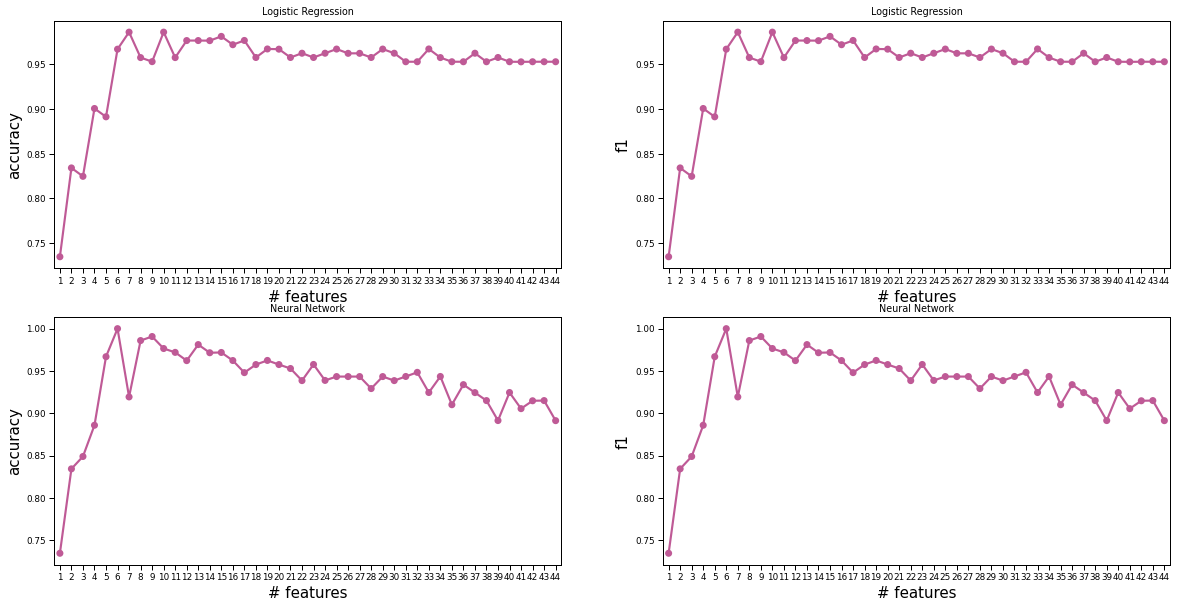

In [85]:
selectionMutual(XCl, X_trainCl, y_trainCl, 'Cleveland')


The number of features which provides the highest accuracy for Logistic Regression in Long Beach is: 14

The number of features which provides the highest F1 for Logistic Regression in Long Beach is: 14

The number of features which provides the highest accuracy for Neural Networks in Long Beach is: 10

The number of features which provides the highest F1 for Neural Networks in Long Beach is: 10


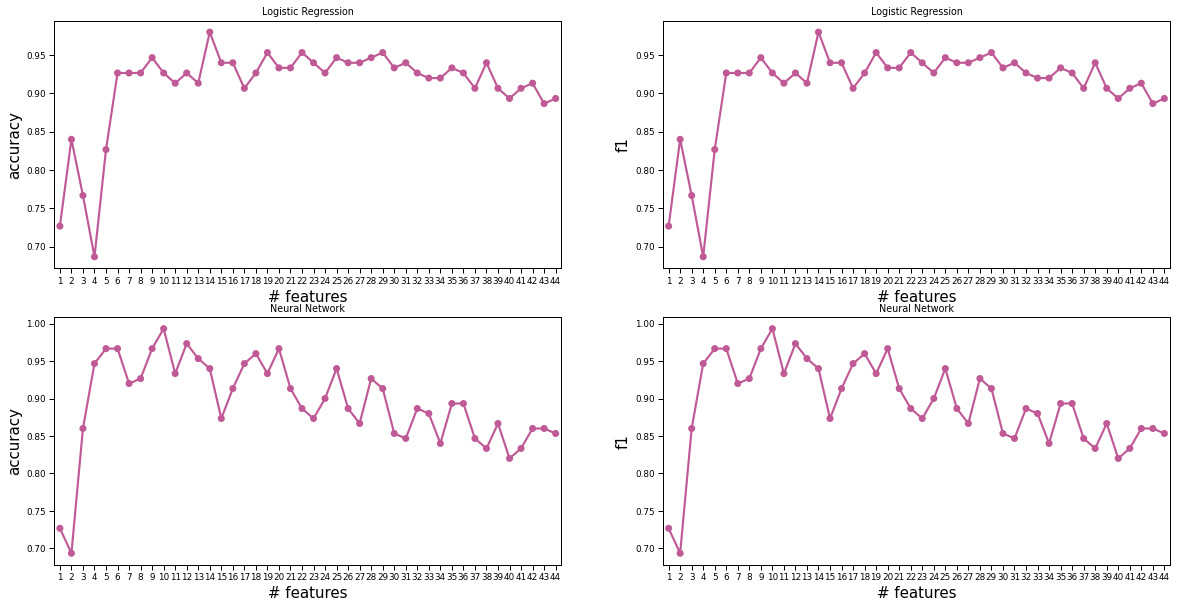

In [86]:
selectionMutual(XLb, X_trainLb, y_trainLb, 'Long Beach')

In [87]:
#--Obtain transformed X_train, X_test
def transformTrainTestMutual(X, X_train, y_train, X_test):
    #Select K best features
    selector = SelectKBest(score_func=mutual_info_regression, k=5)
    #Fit selector with train data
    new_data = selector.fit(X_train, y_train)

    #Obtain 10 most relevant column indices
    cols_index = selector.get_support(indices = True)
    cols = [i for i in X.columns[cols_index]]
    non_relevant = [i for i in X.columns if i not in cols]

    #F-test scores
    score = selector.scores_
    score /= np.max(score)

    #Ranking
    ranking_mi=np.argsort(-score)
    ranking_mi=[i for i in X.columns[ranking_mi]]
    ranking_mi= pd.DataFrame([ranking_mi], columns=np.arange(1,X.shape[1]+1), index=['ranking']).T

    bag_names = []
    for name in X.columns:
        if name not in cols:
            bag_names.append('No')
        else:
            bag_names.append('Yes')

    mutual_info_features = pd.DataFrame([bag_names], columns=X.columns, index=['selected'])

    X_train_mi, X_test_mi = X_train[:, cols_index], X_test[:, cols_index]
    
    return mutual_info_features, ranking_mi, X_train_mi, X_test_mi, cols

In [88]:
mutual_info_featuresCl, ranking_miCl, X_train_miCl, X_test_miCl, colsSelectedClmi = transformTrainTestMutual(XCl, X_trainCl, y_trainCl, X_testCl)
mutual_info_featuresCl

,age,sex,cp,trestbps,htn,cigs,fbs,dm,restecg,ekgmo,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
selected,No,No,No,No,No,No,No,No,No,No,...,No,No,Yes,No,Yes,Yes,Yes,No,No,No


In [89]:
mutual_info_featuresLb, ranking_miLb, X_train_miLb, X_test_miLb, colsSelectedLbmi = transformTrainTestMutual(XLb, X_trainLb, y_trainLb, X_testLb)
mutual_info_featuresLb

,age,sex,cp,trestbps,htn,cigs,fbs,dm,restecg,ekgmo,...,lmt,ladprox,laddist,cxmain,om1,rcaprox,rcadist,lvx3,lvx4,lvf
selected,Yes,No,Yes,No,No,No,No,No,No,No,...,No,No,No,Yes,No,Yes,No,No,No,No


In [90]:
ranking_miCl

,ranking
1,rcadist
2,laddist
3,rcaprox
4,om1
5,exang
6,dm
7,cxmain
8,cp
9,prop
10,thal


In [91]:
ranking_miLb

,ranking
1,rcaprox
2,cxmain
3,cp
4,thaldur
5,age
6,exang
7,lvx4
8,thal
9,rldv5e
10,lmt


In [92]:
def modelEvaluationmi(X_train, X_train_mi, X_test, X_test_mi, y_train, y_test, y_pred_train, y_pred_test, best_params):
    train_accuracy=[]
    train_recall=[]
    train_precision=[]
    train_f1=[]

    cv_accuracy=[]
    cv_precision=[]
    cv_recall=[]
    cv_f1=[]

    test_accuracy=[]
    test_precision=[]
    test_recall=[]
    test_f1=[]

    datasets=[[X_train_mi, X_test_mi], [X_train, X_test]]

    for ix in range(len(models_names)):

        original_model=clone(clfs[ix])

        flag = 0
        for dataset in datasets:

            original_model.fit(dataset[0], y_train)

            #--Train scores
            y_pred_train = original_model.predict(dataset[0])
            train_accuracy.append(accuracy_score(y_train, y_pred_train))
            train_recall.append(recall_score(y_train, y_pred_train))
            train_precision.append(precision_score(y_train, y_pred_train))
            train_f1.append(f1_score(y_train, y_pred_train))

            #--Validation scores
            cv_results = cross_validate(original_model, dataset[0], y_train, scoring=["accuracy", "recall", "precision", "f1"] , return_train_score=True)
            cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
            cv_recall.append(abs(np.mean(cv_results['test_recall'])))
            cv_precision.append(abs(np.mean(cv_results['test_precision'])))
            cv_f1.append(abs(np.mean(cv_results['test_f1'])))

            #--Test scores
            y_pred_test = original_model.predict(dataset[1])
            test_accuracy.append(accuracy_score(y_test, y_pred_test))
            test_recall.append(recall_score(y_test, y_pred_test))
            test_precision.append(precision_score(y_test, y_pred_test))
            test_f1.append(f1_score(y_test, y_pred_test))
            
            #--Confusion matrix
            y_testList = y_test.tolist()
            cf = confusion_matrix(y_testList, y_pred_test) 
            ax = sns.heatmap(cf, annot=True, cmap='Blues')
            
            if (flag==0):
                ax.set_title('Confusion Matrix of '+type(original_model).__name__+' with selected features');
            else:
                ax.set_title('Confusion Matrix of '+type(original_model).__name__);
            ax.set_xlabel('\nPredicted Values')
            ax.set_ylabel('Actual Values ');

            ## Ticket labels - List must be in alphabetical order
            ax.xaxis.set_ticklabels(['False','True'])
            ax.yaxis.set_ticklabels(['False','True'])

            ## Display the visualization of the Confusion Matrix.
            plt.show()
            flag = flag + 1
            

    index_names=['Logistic Regression MI', 'Logistic Regression', 'KNN Classifier MI', 'KNN Classifier', 
                'Decision Tree Classifier MI', 'Decision Tree Classifier', 'Neural Network Classifier MI', 'Neural Network Classifier',
                 'Random Forest Classifier MI', 'Random Forest Classifier'
                ]

    mi_results = pd.DataFrame(list(zip(train_accuracy, train_recall, train_precision, train_f1, cv_accuracy, cv_recall,
                                      cv_precision, cv_f1, test_accuracy, test_recall, test_precision, test_f1)), columns=["Train Accuracy",
                                                                                                           "Train Recall", "Train Precision", "Train F1", 
                                                                                                           "Validation Accuracy", "Validation Recall", 
                                                                                                           "Validation Precision","Validation F1", "Test Accuracy", 
                                                                                                           "Test Recall", "Test Precision", "Test F1"])
    mi_results.index=index_names

    return mi_results

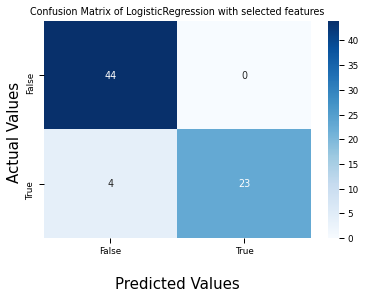

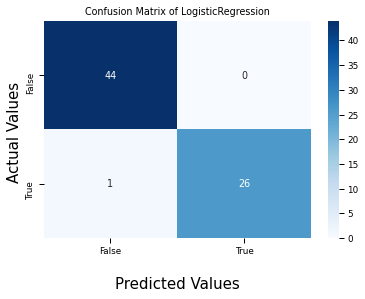

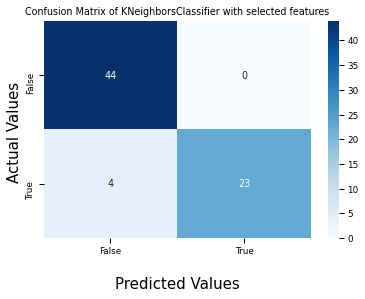

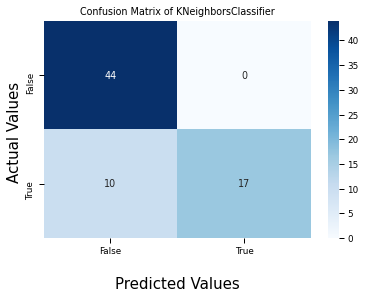

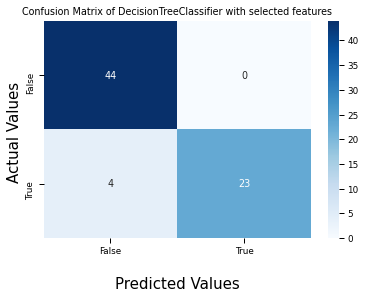

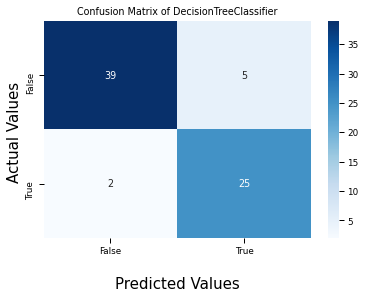

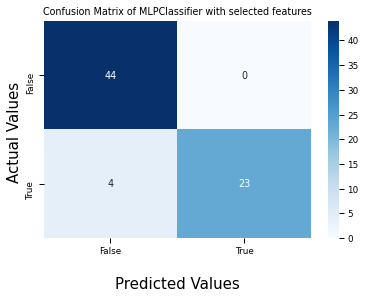

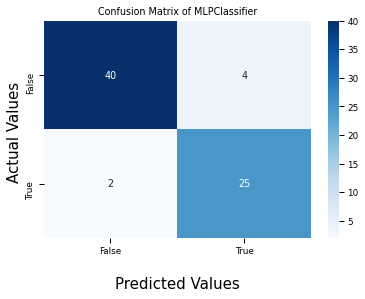

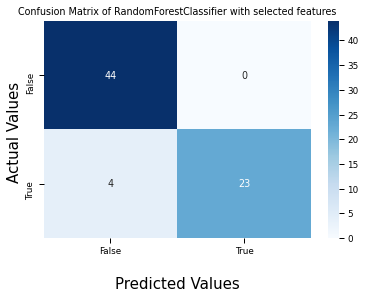

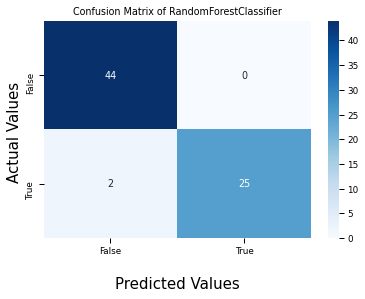

,Train Accuracy,Train Recall,Train Precision,Train F1,Validation Accuracy,Validation Recall,Validation Precision,Validation F1,Test Accuracy,Test Recall,Test Precision,Test F1
Logistic Regression MI,0.928910,0.846939,1.0,0.917127,0.928904,0.846316,1.000000,0.915761,0.943662,0.851852,1.000000,0.920000
Logistic Regression,1.000000,1.000000,1.0,1.000000,0.952824,0.898947,1.000000,0.945623,0.985915,0.962963,1.000000,0.981132
KNN Classifier MI,0.928910,0.846939,1.0,0.917127,0.928904,0.846316,1.000000,0.915761,0.943662,0.851852,1.000000,0.920000
KNN Classifier,0.886256,0.755102,1.0,0.860465,0.834330,0.644211,1.000000,0.781708,0.859155,0.629630,1.000000,0.772727
Decision Tree Classifier MI,0.928910,0.846939,1.0,0.917127,0.928904,0.846316,1.000000,0.915761,0.943662,0.851852,1.000000,0.920000
Decision Tree Classifier,1.000000,1.000000,1.0,1.000000,0.924363,0.918421,0.923103,0.918192,0.901408,0.925926,0.833333,0.877193
Neural Network Classifier MI,0.928910,0.846939,1.0,0.917127,0.928904,0.846316,1.000000,0.915761,0.943662,0.851852,1.000000,0.920000
Neural Network Classifier,1.000000,1.000000,1.0,1.000000,0.891362,0.838421,0.924624,0.878018,0.915493,0.925926,0.862069,0.892857
Random Forest Classifier MI,0.928910,0.846939,1.0,0.917127,0.928904,0.846316,1.000000,0.915761,0.943662,0.851852,1.000000,0.920000
Random Forest Classifier,1.000000,1.000000,1.0,1.000000,0.924695,0.879474,0.954474,0.913159,0.971831,0.925926,1.000000,0.961538


In [93]:
mi_resultsCl = modelEvaluationmi(X_trainCl, X_train_miCl, X_testCl, X_test_miCl, y_trainCl, y_testCl, y_pred_trainCl, y_pred_testCl, best_paramsCl)
mi_resultsCl

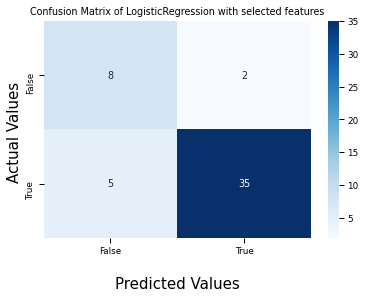

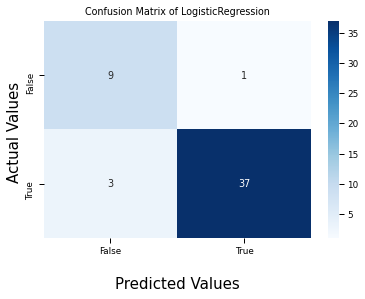

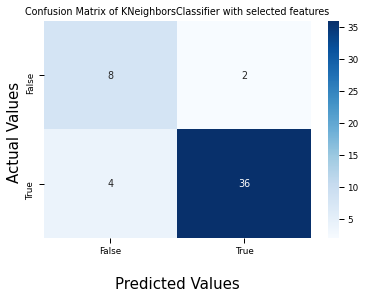

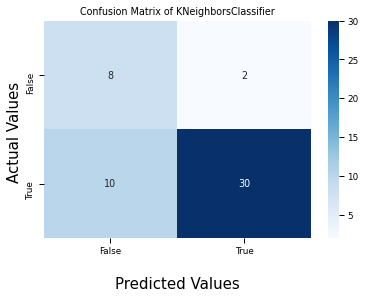

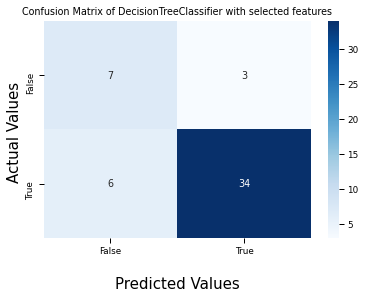

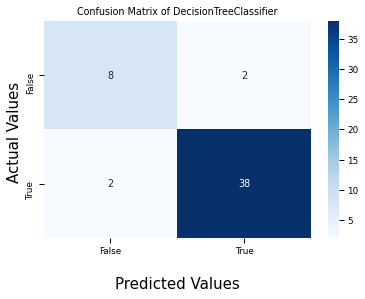

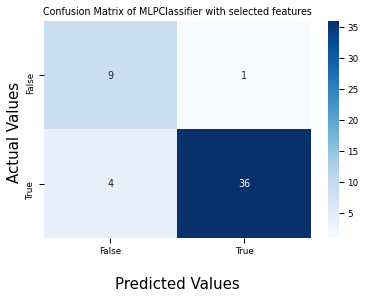

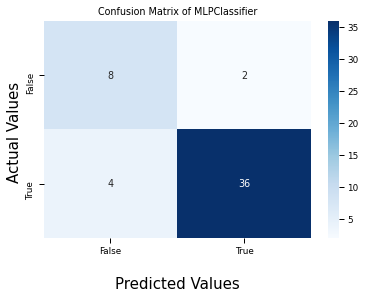

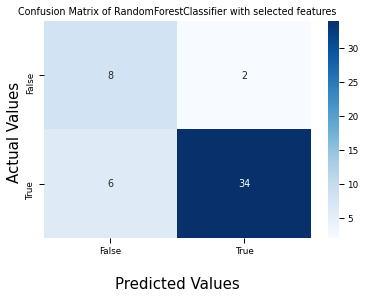

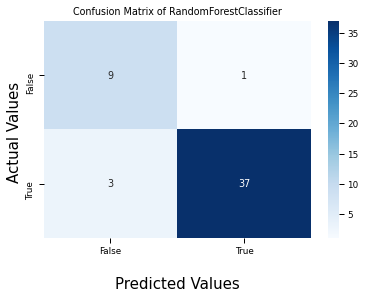

,Train Accuracy,Train Recall,Train Precision,Train F1,Validation Accuracy,Validation Recall,Validation Precision,Validation F1,Test Accuracy,Test Recall,Test Precision,Test F1
Logistic Regression MI,0.846667,0.908257,0.883929,0.895928,0.806667,0.861905,0.876419,0.863455,0.86,0.875,0.945946,0.909091
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.893333,0.870996,0.980952,0.920748,0.92,0.925,0.973684,0.948718
KNN Classifier MI,0.880000,0.899083,0.933333,0.915888,0.826667,0.862338,0.899025,0.877336,0.88,0.900,0.947368,0.923077
KNN Classifier,0.873333,0.880734,0.941176,0.909953,0.820000,0.853680,0.899948,0.871434,0.76,0.750,0.937500,0.833333
Decision Tree Classifier MI,0.993333,0.990826,1.000000,0.995392,0.813333,0.870563,0.871014,0.869858,0.82,0.850,0.918919,0.883117
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,0.986667,0.981385,1.000000,0.990471,0.92,0.950,0.950000,0.950000
Neural Network Classifier MI,0.860000,0.899083,0.907407,0.903226,0.800000,0.870996,0.863014,0.861603,0.90,0.900,0.972973,0.935065
Neural Network Classifier,1.000000,1.000000,1.000000,1.000000,0.853333,0.880519,0.918426,0.897372,0.88,0.900,0.947368,0.923077
Random Forest Classifier MI,0.993333,0.990826,1.000000,0.995392,0.806667,0.843723,0.885588,0.863362,0.84,0.850,0.944444,0.894737
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000,0.900000,0.972294,0.901839,0.934431,0.92,0.925,0.973684,0.948718


In [94]:
mi_resultsLb = modelEvaluationmi(X_trainLb, X_train_miLb, X_testLb, X_test_miLb, y_trainLb, y_testLb, y_pred_trainLb, y_pred_testLb, best_paramsLb)
mi_resultsLb

<a id='Feature importance'></a>
## <span style="color:darkslateblue">6. **Feature Importance**</span>
1. [**Dataset1**: Cleveland](#Cleveland)
2. [**Dataset2**: Long Beach](#LongBeach)


In [174]:
def featureImportance(X, X_train, X_train_sel, X_test, X_test_sel, y_train, y_test, y_pred_train, y_pred_test, cols):
    models_with_importance = []
    Xcolumns = X.columns

    datasets=[[X_train_sel, X_test_sel], [X_train, X_test]]

    for ix in range(len(models_names)):

        original_model=clone(clfs[ix])

        importances = []
        for dataset in datasets:
            
            model_name = type(original_model).__name__
            
            original_model.fit(dataset[0], y_train)
            
            if model_name.find('LogisticRegression') != -1:
                importance = original_model.coef_[0]
                importances.append(importance)
            elif model_name.find('DecisionTree') != -1 or model_name.find('RandomForest') != -1:
                importance = original_model.feature_importances_
                importances.append(importance)
        
        if importances:
            feat_importances = pd.Series(importances[0], index=cols)
            for i,v in enumerate(importances[0]):
                print('Feature: '+cols[i]+', Score: %.5f' % v)
            
            feat_importances.nlargest(5).plot(kind='bar')
            plt.title(type(original_model).__name__)
            plt.show()
            
            feat_importances = pd.Series(importances[1], index=Xcolumns)
            for i,v in enumerate(importances[1]):
                print('Feature: '+Xcolumns[i]+', Score: %.5f' % v)

            feat_importances.nlargest(44).plot(kind='bar')
            plt.title(type(original_model).__name__)
            plt.show()

<a id='Cleveland'></a>
#### <span style="color:#DB8AC4">6.1 Cleveland feature importance</span>

Feature: thal, Score: 0.67615
Feature: laddist, Score: 1.69293
Feature: cxmain, Score: 1.56755
Feature: om1, Score: 1.46607
Feature: rcaprox, Score: 1.62077


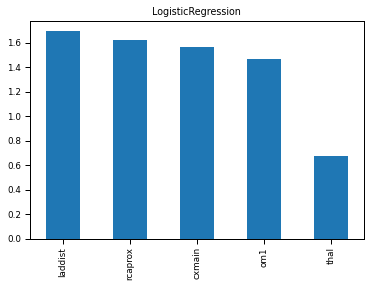

Feature: age, Score: 0.22492
Feature: sex, Score: 0.48369
Feature: cp, Score: 0.19952
Feature: trestbps, Score: 0.15430
Feature: htn, Score: 0.18853
Feature: cigs, Score: -0.07064
Feature: fbs, Score: -0.38598
Feature: dm, Score: 0.34513
Feature: restecg, Score: 0.15636
Feature: ekgmo, Score: 0.27971
Feature: ekgday, Score: -0.19192
Feature: ekgyr, Score: 0.14215
Feature: prop, Score: 0.21225
Feature: nitr, Score: -0.02488
Feature: pro, Score: -0.14436
Feature: diuretic, Score: -0.28309
Feature: thaldur, Score: -0.24119
Feature: thaltime, Score: 0.57680
Feature: met, Score: 0.16318
Feature: thalach, Score: 0.15819
Feature: thalrest, Score: -0.01341
Feature: tpeakbps, Score: 0.01471
Feature: tpeakbpd, Score: 0.20636
Feature: dummy, Score: 0.15430
Feature: trestbpd, Score: 0.04719
Feature: exang, Score: 0.33878
Feature: xhypo, Score: 0.04609
Feature: oldpeak, Score: -0.05333
Feature: slope, Score: 0.08887
Feature: rldv5e, Score: -0.04259
Feature: thal, Score: 0.47357
Feature: cmo, Score:

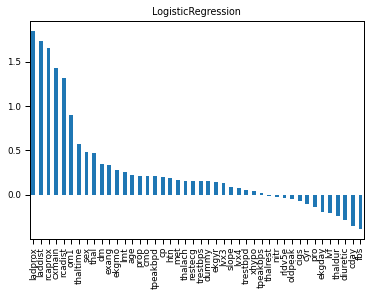

Feature: thal, Score: 0.38602
Feature: laddist, Score: 0.11171
Feature: cxmain, Score: 0.17598
Feature: om1, Score: 0.22326
Feature: rcaprox, Score: 0.10303


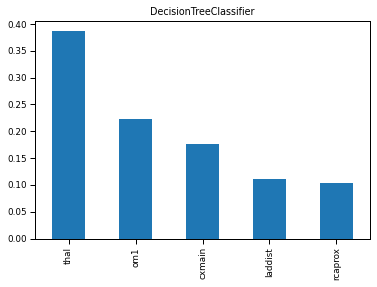

Feature: age, Score: 0.02196
Feature: sex, Score: 0.00000
Feature: cp, Score: 0.01524
Feature: trestbps, Score: 0.00000
Feature: htn, Score: 0.00000
Feature: cigs, Score: 0.00000
Feature: fbs, Score: 0.00000
Feature: dm, Score: 0.00000
Feature: restecg, Score: 0.00000
Feature: ekgmo, Score: 0.00000
Feature: ekgday, Score: 0.00000
Feature: ekgyr, Score: 0.02540
Feature: prop, Score: 0.00000
Feature: nitr, Score: 0.00000
Feature: pro, Score: 0.00887
Feature: diuretic, Score: 0.00000
Feature: thaldur, Score: 0.00000
Feature: thaltime, Score: 0.00000
Feature: met, Score: 0.00000
Feature: thalach, Score: 0.05571
Feature: thalrest, Score: 0.00000
Feature: tpeakbps, Score: 0.00000
Feature: tpeakbpd, Score: 0.00000
Feature: dummy, Score: 0.01508
Feature: trestbpd, Score: 0.00000
Feature: exang, Score: 0.00000
Feature: xhypo, Score: 0.00000
Feature: oldpeak, Score: 0.04762
Feature: slope, Score: 0.00000
Feature: rldv5e, Score: 0.00000
Feature: thal, Score: 0.31475
Feature: cmo, Score: 0.00000
F

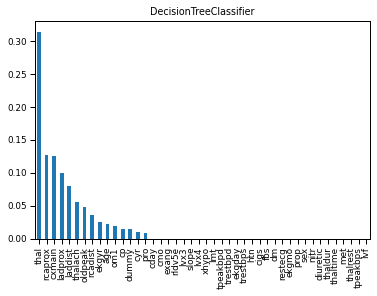

Feature: thal, Score: 0.19990
Feature: laddist, Score: 0.22227
Feature: cxmain, Score: 0.18608
Feature: om1, Score: 0.17943
Feature: rcaprox, Score: 0.21232


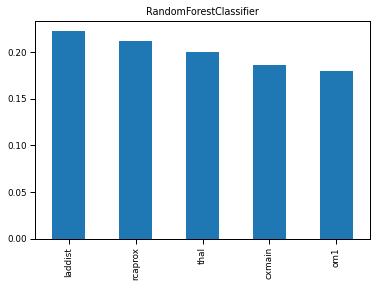

Feature: age, Score: 0.01903
Feature: sex, Score: 0.01305
Feature: cp, Score: 0.04909
Feature: trestbps, Score: 0.01548
Feature: htn, Score: 0.00214
Feature: cigs, Score: 0.01051
Feature: fbs, Score: 0.00146
Feature: dm, Score: 0.00303
Feature: restecg, Score: 0.00561
Feature: ekgmo, Score: 0.01071
Feature: ekgday, Score: 0.01310
Feature: ekgyr, Score: 0.00614
Feature: prop, Score: 0.00584
Feature: nitr, Score: 0.00257
Feature: pro, Score: 0.00447
Feature: diuretic, Score: 0.00291
Feature: thaldur, Score: 0.02445
Feature: thaltime, Score: 0.02318
Feature: met, Score: 0.01547
Feature: thalach, Score: 0.02479
Feature: thalrest, Score: 0.01702
Feature: tpeakbps, Score: 0.01080
Feature: tpeakbpd, Score: 0.01019
Feature: dummy, Score: 0.01486
Feature: trestbpd, Score: 0.01205
Feature: exang, Score: 0.03833
Feature: xhypo, Score: 0.00059
Feature: oldpeak, Score: 0.03436
Feature: slope, Score: 0.01825
Feature: rldv5e, Score: 0.01309
Feature: thal, Score: 0.08627
Feature: cmo, Score: 0.01255
F

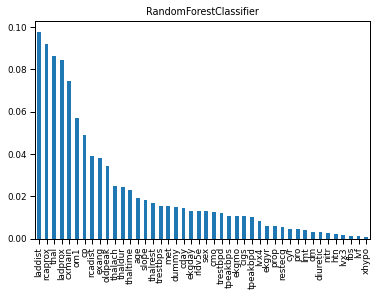

In [175]:
featureImportance(XCl, X_trainCl, X_train_fsCl, X_testCl, X_test_fsCl, y_trainCl, y_testCl, y_pred_trainCl, y_pred_testCl, colsSelectedClF1)

Feature: thal, Score: 0.62083
Feature: ladprox, Score: 1.82091
Feature: laddist, Score: 1.88597
Feature: om1, Score: 1.60908
Feature: rcaprox, Score: 1.71063


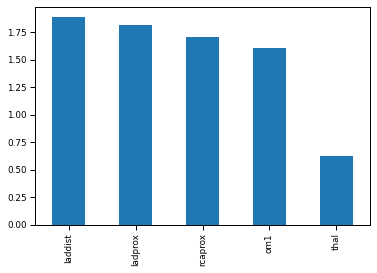

Feature: age, Score: 0.22492
Feature: sex, Score: 0.48369
Feature: cp, Score: 0.19952
Feature: trestbps, Score: 0.15430
Feature: htn, Score: 0.18853
Feature: cigs, Score: -0.07064
Feature: fbs, Score: -0.38598
Feature: dm, Score: 0.34513
Feature: restecg, Score: 0.15636
Feature: ekgmo, Score: 0.27971
Feature: ekgday, Score: -0.19192
Feature: ekgyr, Score: 0.14215
Feature: prop, Score: 0.21225
Feature: nitr, Score: -0.02488
Feature: pro, Score: -0.14436
Feature: diuretic, Score: -0.28309
Feature: thaldur, Score: -0.24119
Feature: thaltime, Score: 0.57680
Feature: met, Score: 0.16318
Feature: thalach, Score: 0.15819
Feature: thalrest, Score: -0.01341
Feature: tpeakbps, Score: 0.01471
Feature: tpeakbpd, Score: 0.20636
Feature: dummy, Score: 0.15430
Feature: trestbpd, Score: 0.04719
Feature: exang, Score: 0.33878
Feature: xhypo, Score: 0.04609
Feature: oldpeak, Score: -0.05333
Feature: slope, Score: 0.08887
Feature: rldv5e, Score: -0.04259
Feature: thal, Score: 0.47357
Feature: cmo, Score:

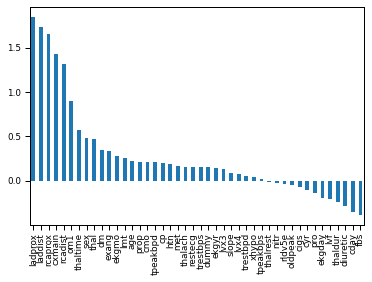

Feature: thal, Score: 0.35927
Feature: ladprox, Score: 0.17964
Feature: laddist, Score: 0.12410
Feature: om1, Score: 0.21899
Feature: rcaprox, Score: 0.11800


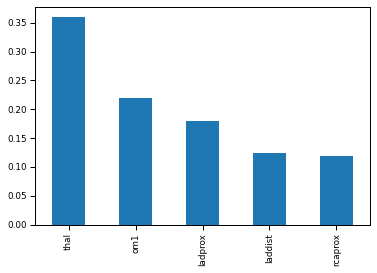

Feature: age, Score: 0.02196
Feature: sex, Score: 0.00000
Feature: cp, Score: 0.01524
Feature: trestbps, Score: 0.00000
Feature: htn, Score: 0.00000
Feature: cigs, Score: 0.00000
Feature: fbs, Score: 0.00000
Feature: dm, Score: 0.00000
Feature: restecg, Score: 0.00000
Feature: ekgmo, Score: 0.00000
Feature: ekgday, Score: 0.00000
Feature: ekgyr, Score: 0.02540
Feature: prop, Score: 0.00000
Feature: nitr, Score: 0.00000
Feature: pro, Score: 0.00887
Feature: diuretic, Score: 0.00000
Feature: thaldur, Score: 0.00000
Feature: thaltime, Score: 0.00000
Feature: met, Score: 0.00000
Feature: thalach, Score: 0.05571
Feature: thalrest, Score: 0.00000
Feature: tpeakbps, Score: 0.00000
Feature: tpeakbpd, Score: 0.00000
Feature: dummy, Score: 0.01508
Feature: trestbpd, Score: 0.00000
Feature: exang, Score: 0.00000
Feature: xhypo, Score: 0.00000
Feature: oldpeak, Score: 0.04762
Feature: slope, Score: 0.00000
Feature: rldv5e, Score: 0.00000
Feature: thal, Score: 0.31475
Feature: cmo, Score: 0.00000
F

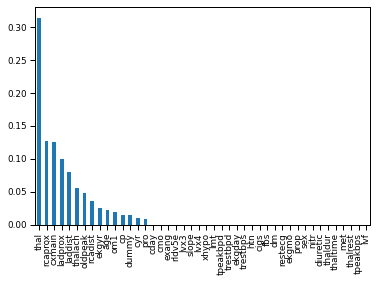

Feature: thal, Score: 0.17141
Feature: ladprox, Score: 0.21817
Feature: laddist, Score: 0.23902
Feature: om1, Score: 0.16553
Feature: rcaprox, Score: 0.20587


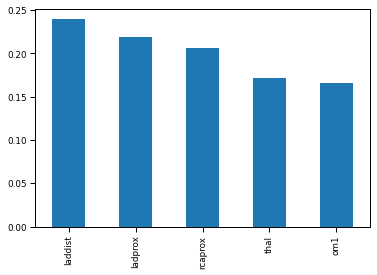

Feature: age, Score: 0.01903
Feature: sex, Score: 0.01305
Feature: cp, Score: 0.04909
Feature: trestbps, Score: 0.01548
Feature: htn, Score: 0.00214
Feature: cigs, Score: 0.01051
Feature: fbs, Score: 0.00146
Feature: dm, Score: 0.00303
Feature: restecg, Score: 0.00561
Feature: ekgmo, Score: 0.01071
Feature: ekgday, Score: 0.01310
Feature: ekgyr, Score: 0.00614
Feature: prop, Score: 0.00584
Feature: nitr, Score: 0.00257
Feature: pro, Score: 0.00447
Feature: diuretic, Score: 0.00291
Feature: thaldur, Score: 0.02445
Feature: thaltime, Score: 0.02318
Feature: met, Score: 0.01547
Feature: thalach, Score: 0.02479
Feature: thalrest, Score: 0.01702
Feature: tpeakbps, Score: 0.01080
Feature: tpeakbpd, Score: 0.01019
Feature: dummy, Score: 0.01486
Feature: trestbpd, Score: 0.01205
Feature: exang, Score: 0.03833
Feature: xhypo, Score: 0.00059
Feature: oldpeak, Score: 0.03436
Feature: slope, Score: 0.01825
Feature: rldv5e, Score: 0.01309
Feature: thal, Score: 0.08627
Feature: cmo, Score: 0.01255
F

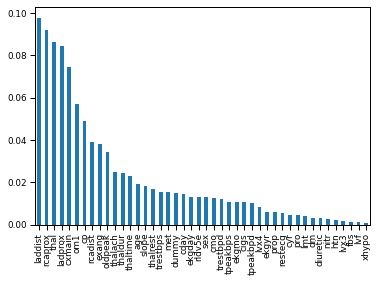

In [167]:
featureImportance(XCl, X_trainCl, X_train_miCl, X_testCl, X_test_miCl, y_trainCl, y_testCl, y_pred_trainCl, y_pred_testCl, colsSelectedClmi)

<a id='LongBeach'></a>
#### <span style="color:#DB8AC4">6.2 Long Beach feature importance</span>

Feature: age, Score: 0.37884
Feature: ladprox, Score: 1.63958
Feature: cxmain, Score: 1.47702
Feature: rcaprox, Score: 1.53058
Feature: lvx4, Score: 0.06149


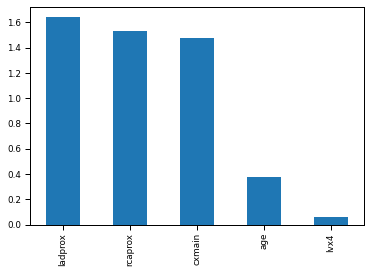

Feature: age, Score: 0.41072
Feature: sex, Score: -0.02162
Feature: cp, Score: 0.48537
Feature: trestbps, Score: 0.09895
Feature: htn, Score: -0.03316
Feature: cigs, Score: -0.30337
Feature: fbs, Score: 0.23848
Feature: dm, Score: 0.16342
Feature: restecg, Score: -0.31628
Feature: ekgmo, Score: -0.01499
Feature: ekgday, Score: -0.00664
Feature: ekgyr, Score: -0.13877
Feature: prop, Score: -0.47832
Feature: nitr, Score: -0.06017
Feature: pro, Score: 0.14228
Feature: diuretic, Score: -0.07714
Feature: thaldur, Score: 0.46186
Feature: thaltime, Score: 0.11507
Feature: met, Score: 0.12637
Feature: thalach, Score: -0.28615
Feature: thalrest, Score: 0.06121
Feature: tpeakbps, Score: -0.10545
Feature: tpeakbpd, Score: -0.02081
Feature: dummy, Score: 0.09895
Feature: trestbpd, Score: 0.04661
Feature: exang, Score: 0.02037
Feature: xhypo, Score: -0.20741
Feature: oldpeak, Score: -0.01913
Feature: slope, Score: 0.12050
Feature: rldv5e, Score: -0.40835
Feature: thal, Score: 0.30560
Feature: cmo, 

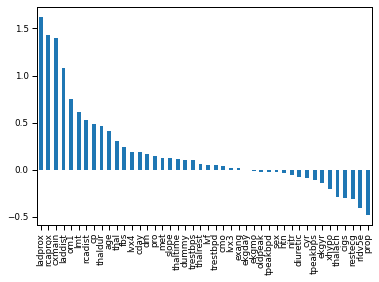

Feature: age, Score: 0.20180
Feature: ladprox, Score: 0.27150
Feature: cxmain, Score: 0.24435
Feature: rcaprox, Score: 0.28235
Feature: lvx4, Score: 0.00000


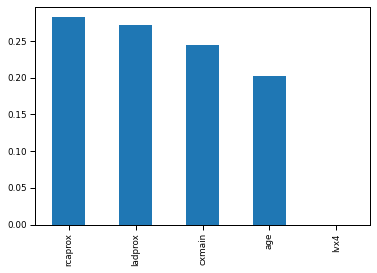

Feature: age, Score: 0.03124
Feature: sex, Score: 0.00000
Feature: cp, Score: 0.00000
Feature: trestbps, Score: 0.00000
Feature: htn, Score: 0.00000
Feature: cigs, Score: 0.00000
Feature: fbs, Score: 0.00000
Feature: dm, Score: 0.00000
Feature: restecg, Score: 0.00000
Feature: ekgmo, Score: 0.00000
Feature: ekgday, Score: 0.00000
Feature: ekgyr, Score: 0.00000
Feature: prop, Score: 0.00000
Feature: nitr, Score: 0.00000
Feature: pro, Score: 0.00000
Feature: diuretic, Score: 0.00000
Feature: thaldur, Score: 0.03277
Feature: thaltime, Score: 0.00000
Feature: met, Score: 0.00000
Feature: thalach, Score: 0.00000
Feature: thalrest, Score: 0.00000
Feature: tpeakbps, Score: 0.00000
Feature: tpeakbpd, Score: 0.00000
Feature: dummy, Score: 0.00000
Feature: trestbpd, Score: 0.00000
Feature: exang, Score: 0.00000
Feature: xhypo, Score: 0.00000
Feature: oldpeak, Score: 0.00000
Feature: slope, Score: 0.00000
Feature: rldv5e, Score: 0.00000
Feature: thal, Score: 0.00000
Feature: cmo, Score: 0.00000
F

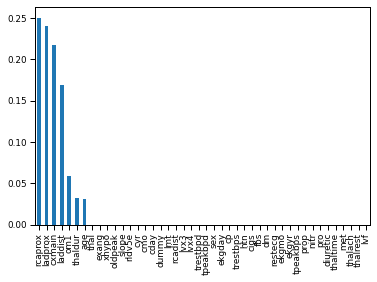

Feature: age, Score: 0.26420
Feature: ladprox, Score: 0.24366
Feature: cxmain, Score: 0.20934
Feature: rcaprox, Score: 0.25917
Feature: lvx4, Score: 0.02364


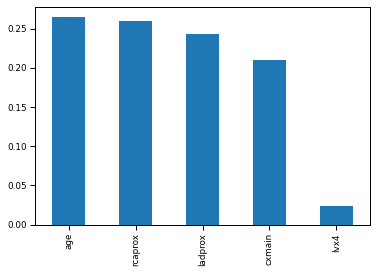

Feature: age, Score: 0.04305
Feature: sex, Score: 0.00141
Feature: cp, Score: 0.01923
Feature: trestbps, Score: 0.01735
Feature: htn, Score: 0.00280
Feature: cigs, Score: 0.01266
Feature: fbs, Score: 0.00509
Feature: dm, Score: 0.00340
Feature: restecg, Score: 0.00628
Feature: ekgmo, Score: 0.01981
Feature: ekgday, Score: 0.01486
Feature: ekgyr, Score: 0.01505
Feature: prop, Score: 0.00888
Feature: nitr, Score: 0.00488
Feature: pro, Score: 0.00569
Feature: diuretic, Score: 0.00779
Feature: thaldur, Score: 0.03563
Feature: thaltime, Score: 0.02221
Feature: met, Score: 0.01592
Feature: thalach, Score: 0.03842
Feature: thalrest, Score: 0.03058
Feature: tpeakbps, Score: 0.02378
Feature: tpeakbpd, Score: 0.02663
Feature: dummy, Score: 0.02094
Feature: trestbpd, Score: 0.02353
Feature: exang, Score: 0.01368
Feature: xhypo, Score: 0.00023
Feature: oldpeak, Score: 0.01878
Feature: slope, Score: 0.01798
Feature: rldv5e, Score: 0.02761
Feature: thal, Score: 0.02655
Feature: cmo, Score: 0.02088
F

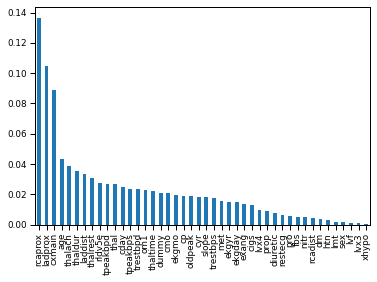

In [170]:
featureImportance(XLb, X_trainLb, X_train_fsLb, X_testLb, X_test_fsLb, y_trainLb, y_testLb, y_pred_trainLb, y_pred_testLb, colsSelectedLbF1)

Feature: dm, Score: -0.05876
Feature: ladprox, Score: 1.67878
Feature: cxmain, Score: 1.49075
Feature: rcaprox, Score: 1.57710
Feature: lvf, Score: -0.16511


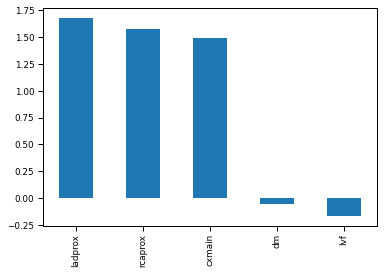

Feature: age, Score: 0.41072
Feature: sex, Score: -0.02162
Feature: cp, Score: 0.48537
Feature: trestbps, Score: 0.09895
Feature: htn, Score: -0.03316
Feature: cigs, Score: -0.30337
Feature: fbs, Score: 0.23848
Feature: dm, Score: 0.16342
Feature: restecg, Score: -0.31628
Feature: ekgmo, Score: -0.01499
Feature: ekgday, Score: -0.00664
Feature: ekgyr, Score: -0.13877
Feature: prop, Score: -0.47832
Feature: nitr, Score: -0.06017
Feature: pro, Score: 0.14228
Feature: diuretic, Score: -0.07714
Feature: thaldur, Score: 0.46186
Feature: thaltime, Score: 0.11507
Feature: met, Score: 0.12637
Feature: thalach, Score: -0.28615
Feature: thalrest, Score: 0.06121
Feature: tpeakbps, Score: -0.10545
Feature: tpeakbpd, Score: -0.02081
Feature: dummy, Score: 0.09895
Feature: trestbpd, Score: 0.04661
Feature: exang, Score: 0.02037
Feature: xhypo, Score: -0.20741
Feature: oldpeak, Score: -0.01913
Feature: slope, Score: 0.12050
Feature: rldv5e, Score: -0.40835
Feature: thal, Score: 0.30560
Feature: cmo, 

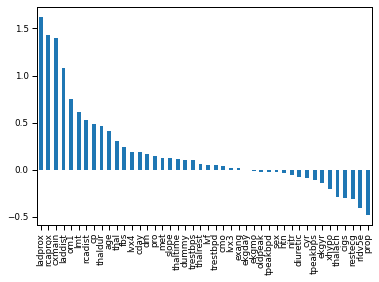

Feature: dm, Score: 0.00121
Feature: ladprox, Score: 0.33745
Feature: cxmain, Score: 0.30370
Feature: rcaprox, Score: 0.35095
Feature: lvf, Score: 0.00669


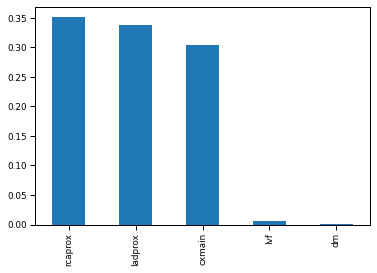

Feature: age, Score: 0.03124
Feature: sex, Score: 0.00000
Feature: cp, Score: 0.00000
Feature: trestbps, Score: 0.00000
Feature: htn, Score: 0.00000
Feature: cigs, Score: 0.00000
Feature: fbs, Score: 0.00000
Feature: dm, Score: 0.00000
Feature: restecg, Score: 0.00000
Feature: ekgmo, Score: 0.00000
Feature: ekgday, Score: 0.00000
Feature: ekgyr, Score: 0.00000
Feature: prop, Score: 0.00000
Feature: nitr, Score: 0.00000
Feature: pro, Score: 0.00000
Feature: diuretic, Score: 0.00000
Feature: thaldur, Score: 0.03277
Feature: thaltime, Score: 0.00000
Feature: met, Score: 0.00000
Feature: thalach, Score: 0.00000
Feature: thalrest, Score: 0.00000
Feature: tpeakbps, Score: 0.00000
Feature: tpeakbpd, Score: 0.00000
Feature: dummy, Score: 0.00000
Feature: trestbpd, Score: 0.00000
Feature: exang, Score: 0.00000
Feature: xhypo, Score: 0.00000
Feature: oldpeak, Score: 0.00000
Feature: slope, Score: 0.00000
Feature: rldv5e, Score: 0.00000
Feature: thal, Score: 0.00000
Feature: cmo, Score: 0.00000
F

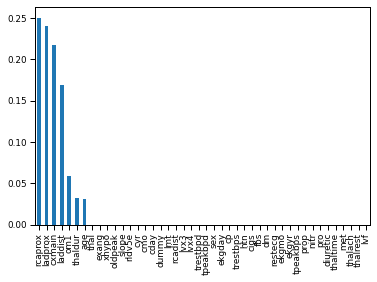

Feature: dm, Score: 0.01166
Feature: ladprox, Score: 0.32658
Feature: cxmain, Score: 0.29507
Feature: rcaprox, Score: 0.34443
Feature: lvf, Score: 0.02225


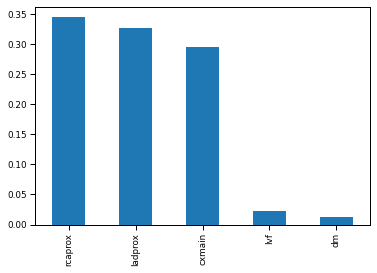

Feature: age, Score: 0.04305
Feature: sex, Score: 0.00141
Feature: cp, Score: 0.01923
Feature: trestbps, Score: 0.01735
Feature: htn, Score: 0.00280
Feature: cigs, Score: 0.01266
Feature: fbs, Score: 0.00509
Feature: dm, Score: 0.00340
Feature: restecg, Score: 0.00628
Feature: ekgmo, Score: 0.01981
Feature: ekgday, Score: 0.01486
Feature: ekgyr, Score: 0.01505
Feature: prop, Score: 0.00888
Feature: nitr, Score: 0.00488
Feature: pro, Score: 0.00569
Feature: diuretic, Score: 0.00779
Feature: thaldur, Score: 0.03563
Feature: thaltime, Score: 0.02221
Feature: met, Score: 0.01592
Feature: thalach, Score: 0.03842
Feature: thalrest, Score: 0.03058
Feature: tpeakbps, Score: 0.02378
Feature: tpeakbpd, Score: 0.02663
Feature: dummy, Score: 0.02094
Feature: trestbpd, Score: 0.02353
Feature: exang, Score: 0.01368
Feature: xhypo, Score: 0.00023
Feature: oldpeak, Score: 0.01878
Feature: slope, Score: 0.01798
Feature: rldv5e, Score: 0.02761
Feature: thal, Score: 0.02655
Feature: cmo, Score: 0.02088
F

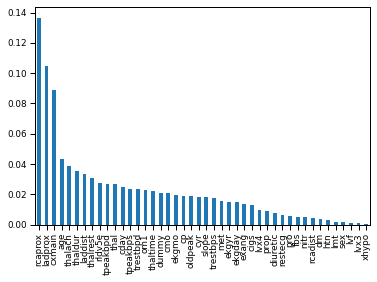

In [171]:
featureImportance(XLb, X_trainLb, X_train_miLb, X_testLb, X_test_miLb, y_trainLb, y_testLb, y_pred_trainLb, y_pred_testLb, colsSelectedLbmi)